In [11]:
import pandas as pd
import numpy as np
from scipy import stats as sp
import matplotlib.pyplot as plt
import sys, os
sys.path.append('../')
import trace_analysis
import plots_analysis
import trace_statistics

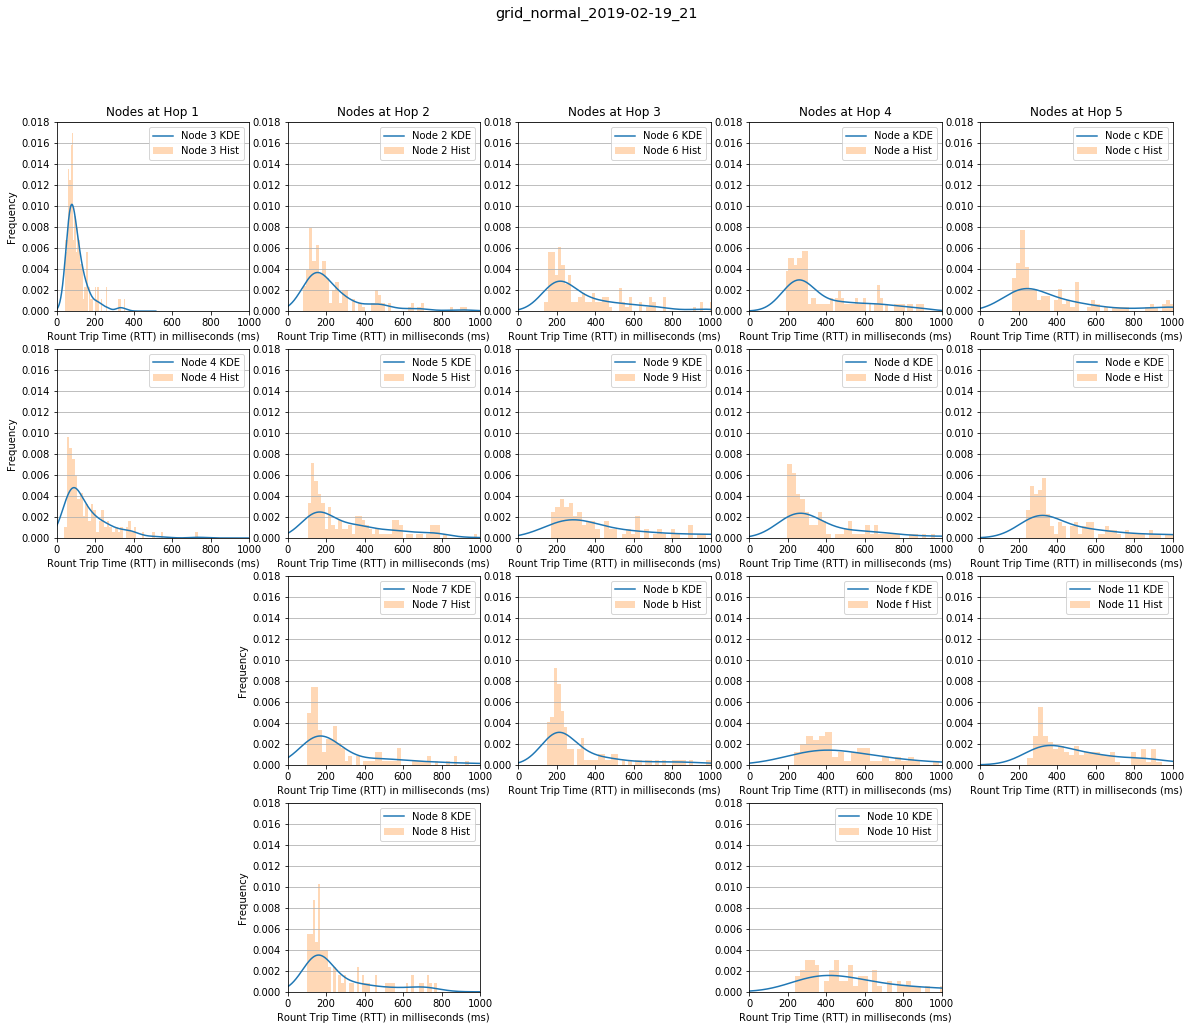

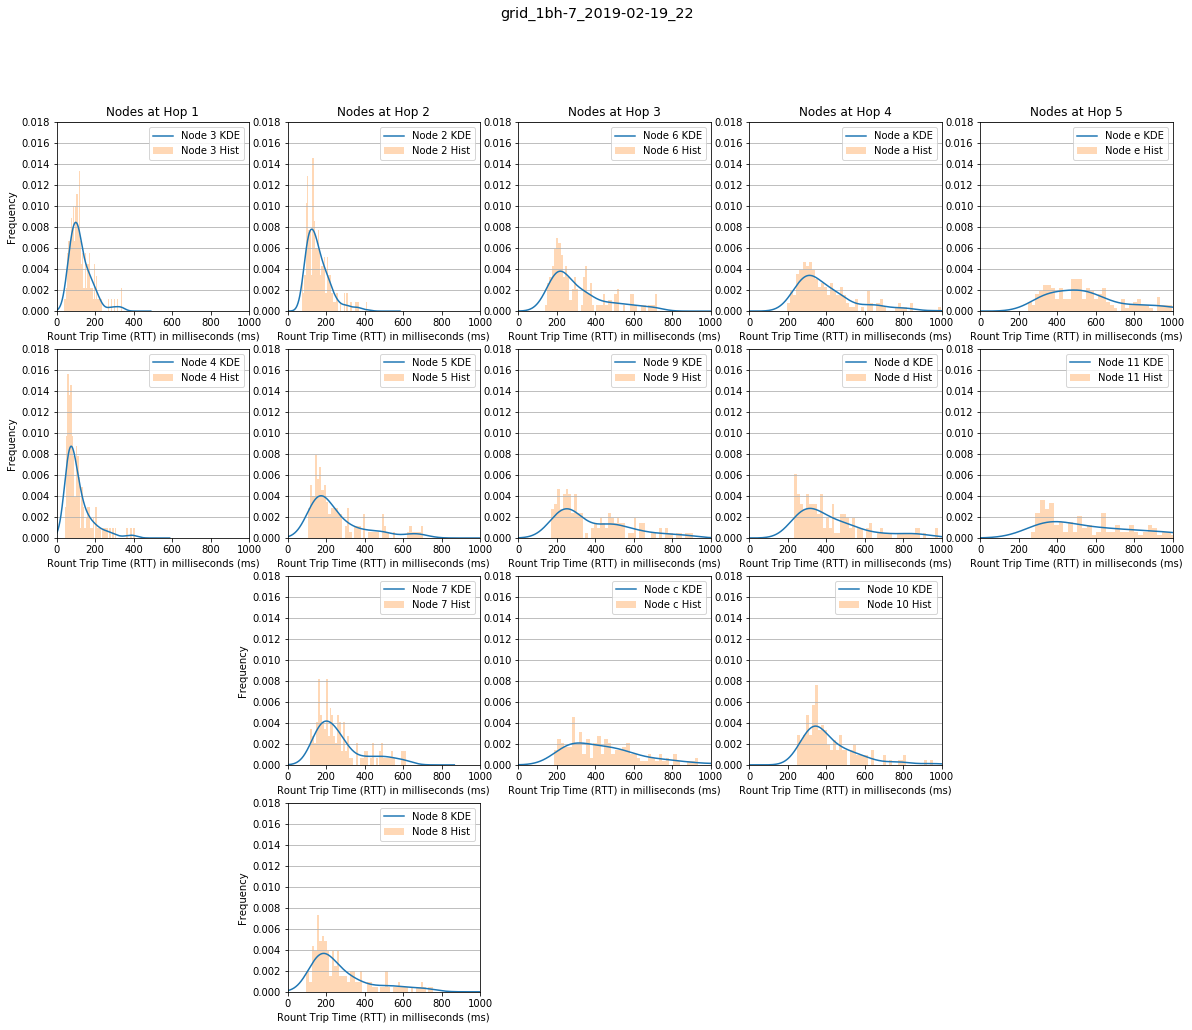

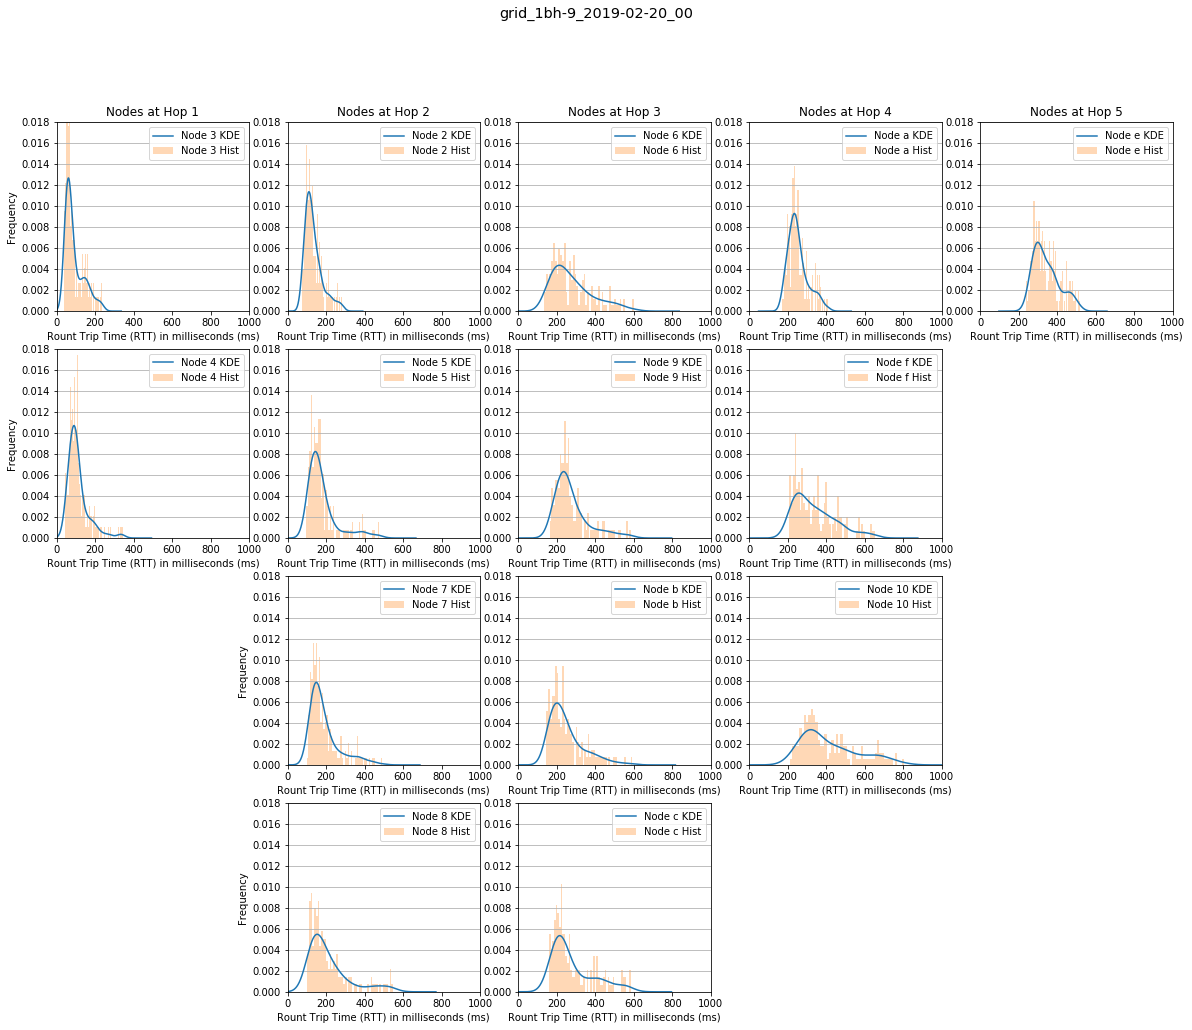

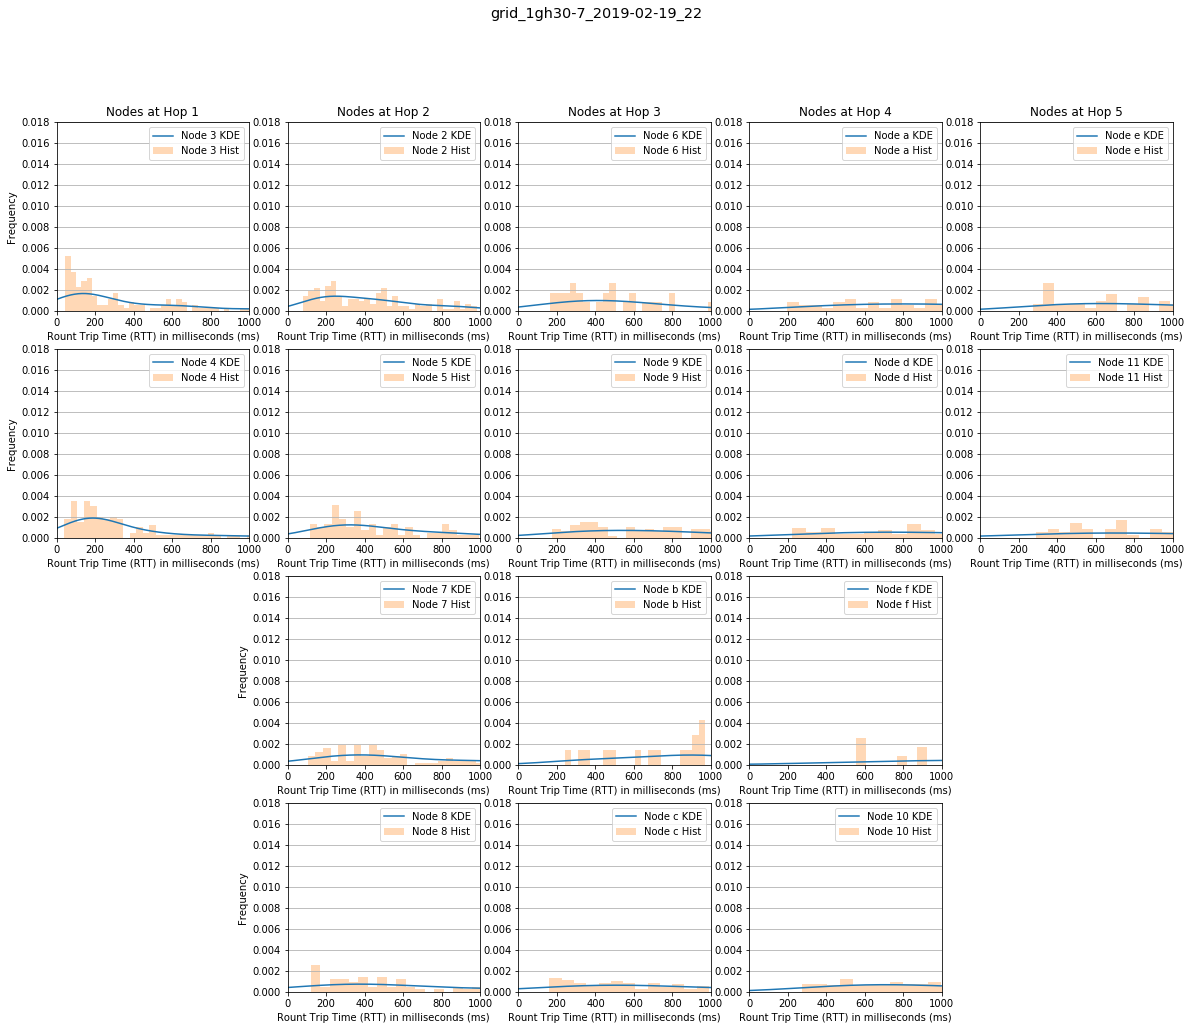

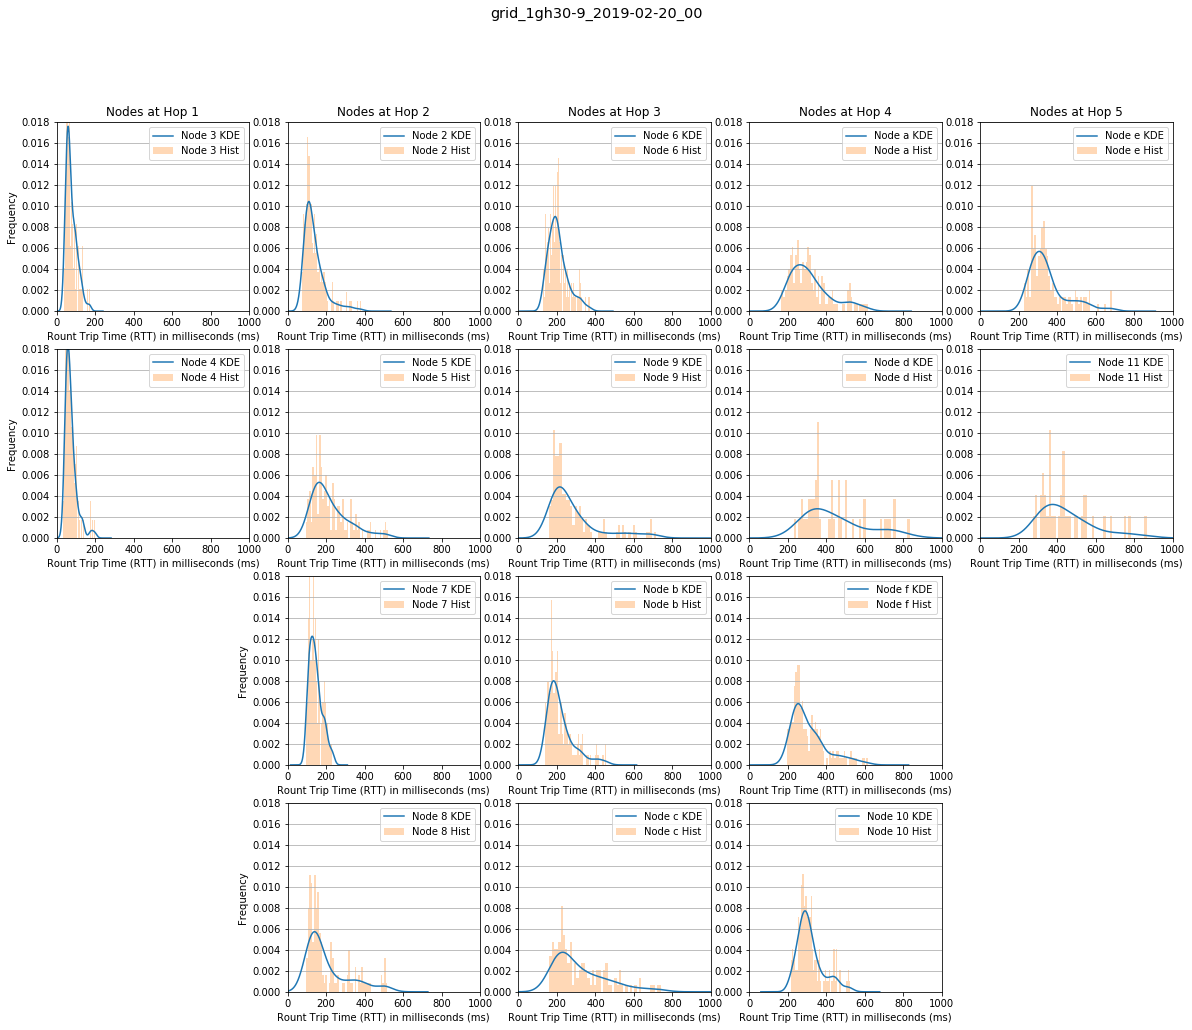

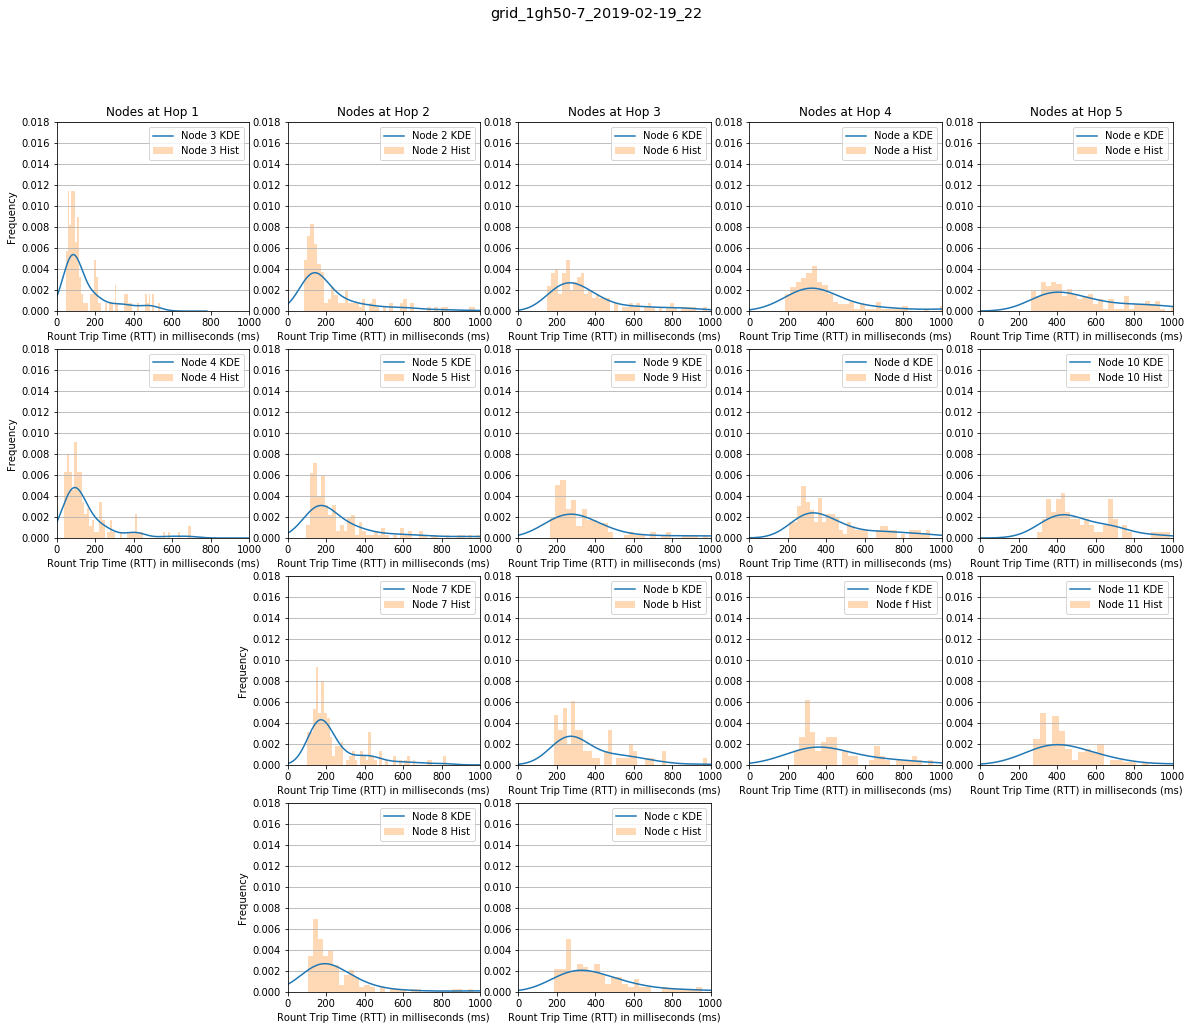

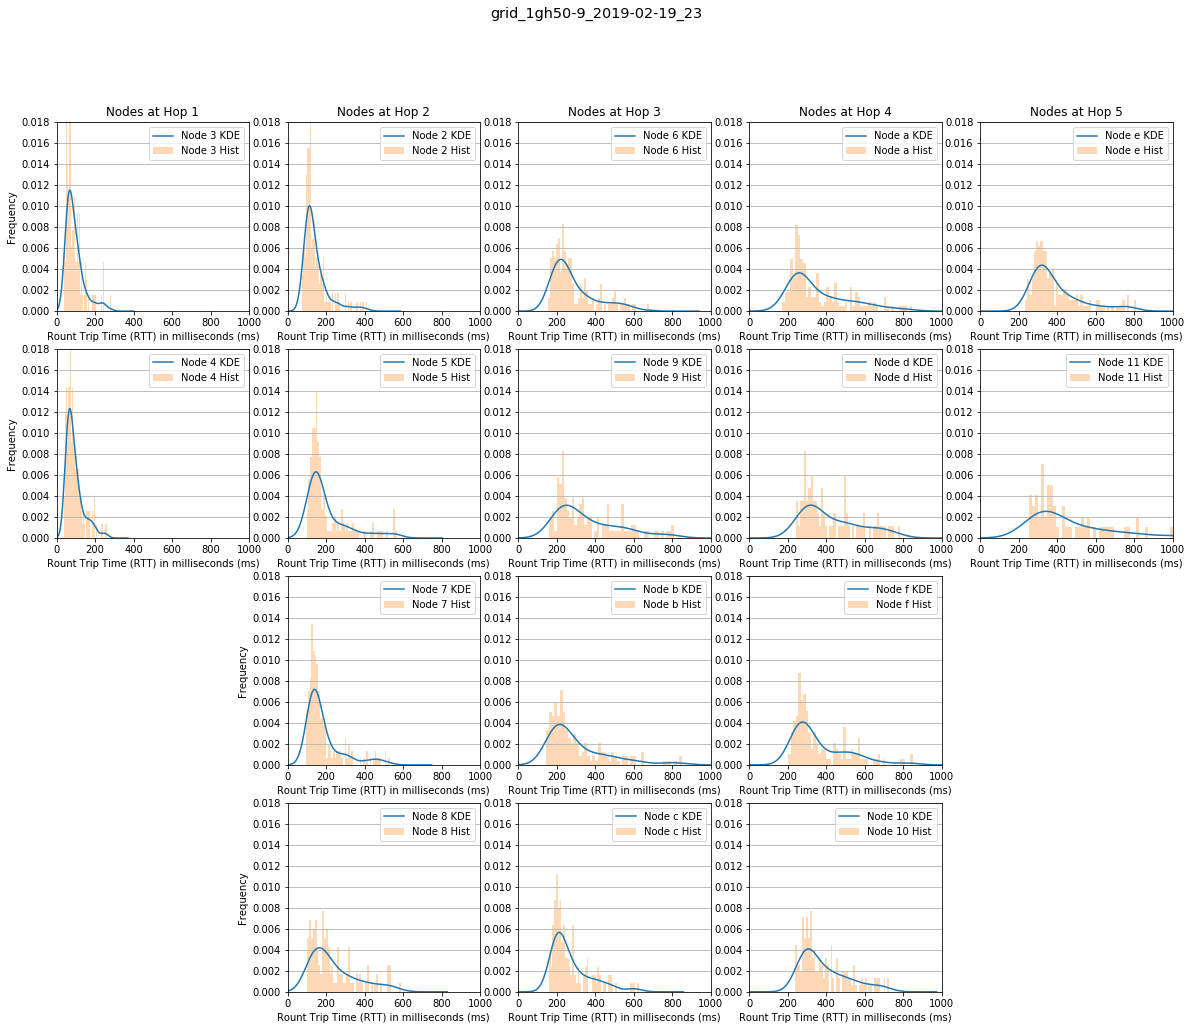

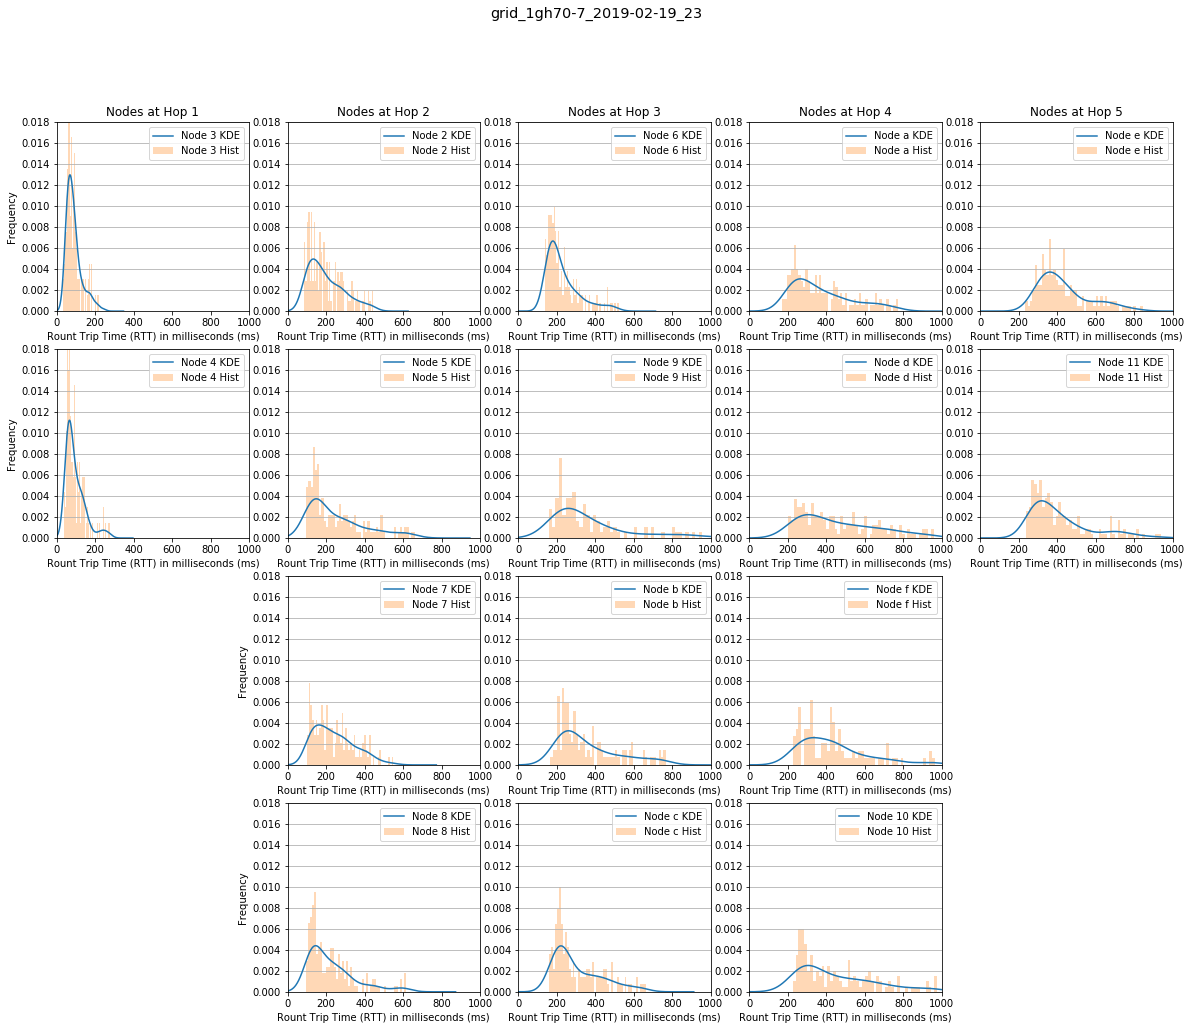

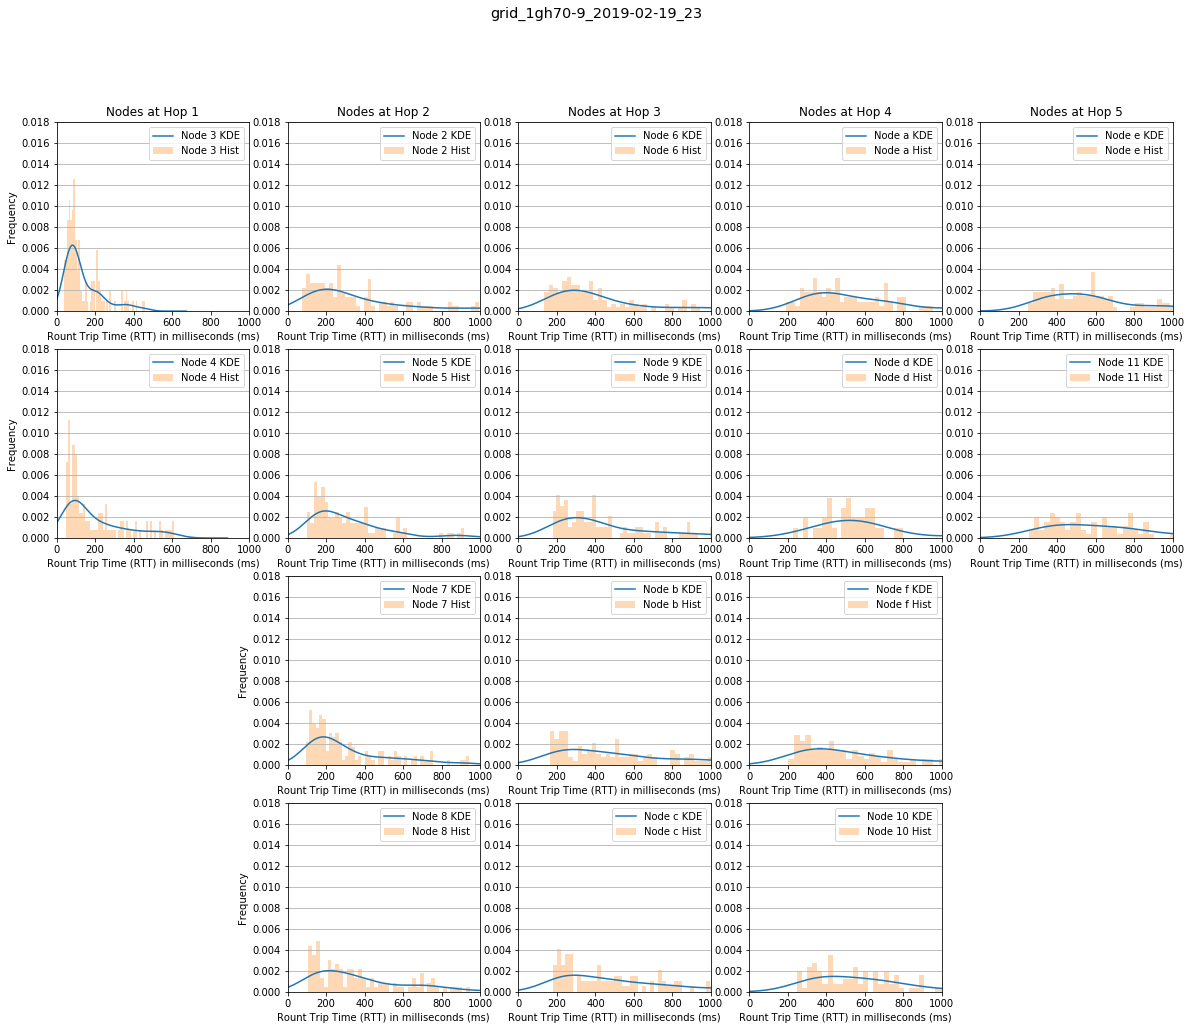

In [12]:
plots = [("traces/normal/", 'grid_normal_2019-02-19_21'),
         ("traces/1bh-7/", 'grid_1bh-7_2019-02-19_22'),
         ("traces/1bh-9/", 'grid_1bh-9_2019-02-20_00'),
         ("traces/1gh30-7/", 'grid_1gh30-7_2019-02-19_22'),
         ("traces/1gh30-9/", 'grid_1gh30-9_2019-02-20_00'),
         ("traces/1gh50-7/", 'grid_1gh50-7_2019-02-19_22'),
         ("traces/1gh50-9/", 'grid_1gh50-9_2019-02-19_23'),
         ("traces/1gh70-7/", 'grid_1gh70-7_2019-02-19_23'),
         ("traces/1gh70-9/", 'grid_1gh70-9_2019-02-19_23')
        ]

for row in plots:
    nodes, packets_node = trace_analysis.process_cooja2_traces(row[0], row[1])
    clean = trace_analysis.separate_outliers_by_node(packets_node)
    plots_analysis.plot_histograms_hops_nodes(nodes, clean, 1000, 0.018, row[1])

Tumbling windows

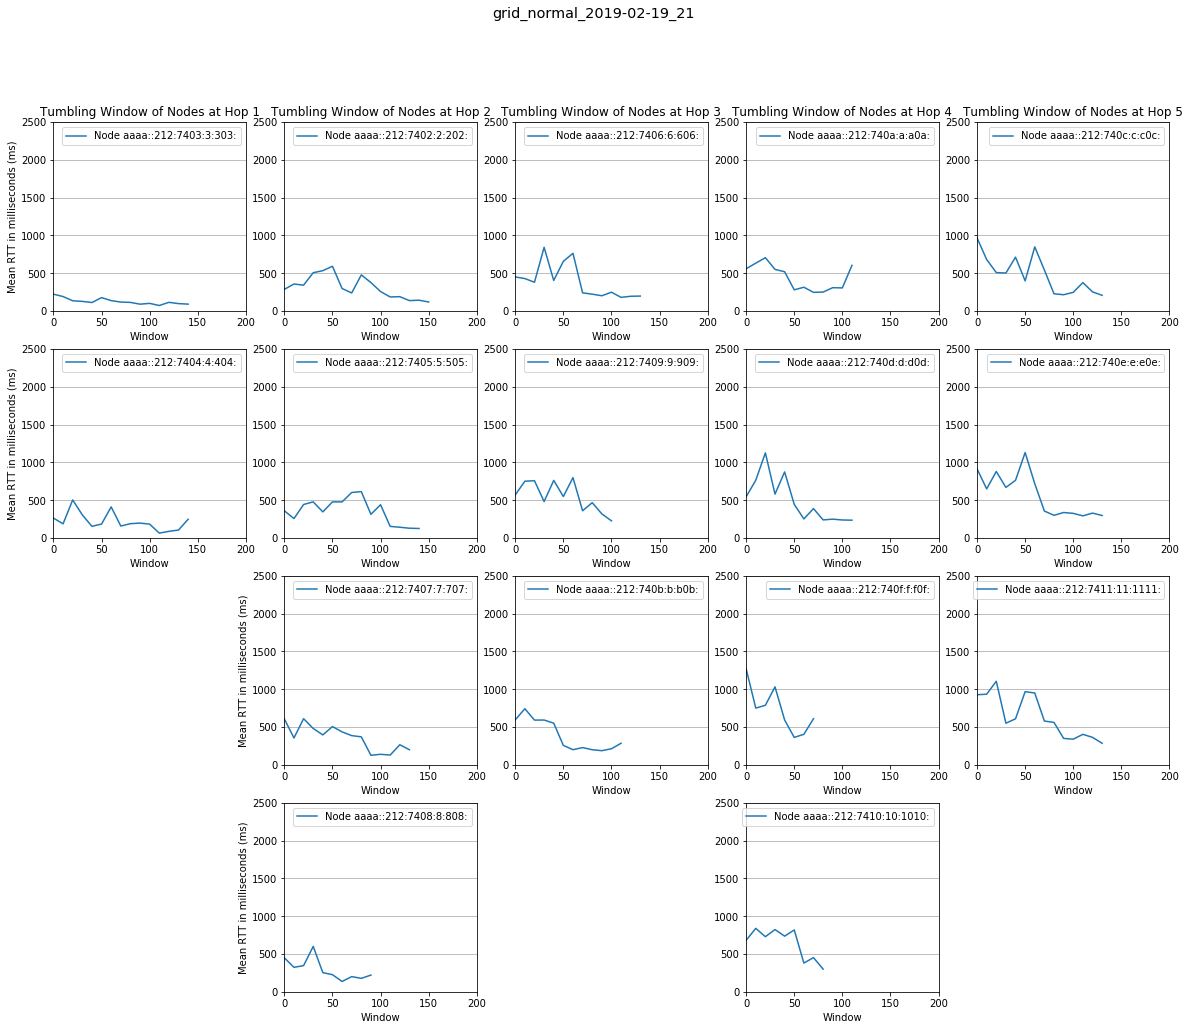

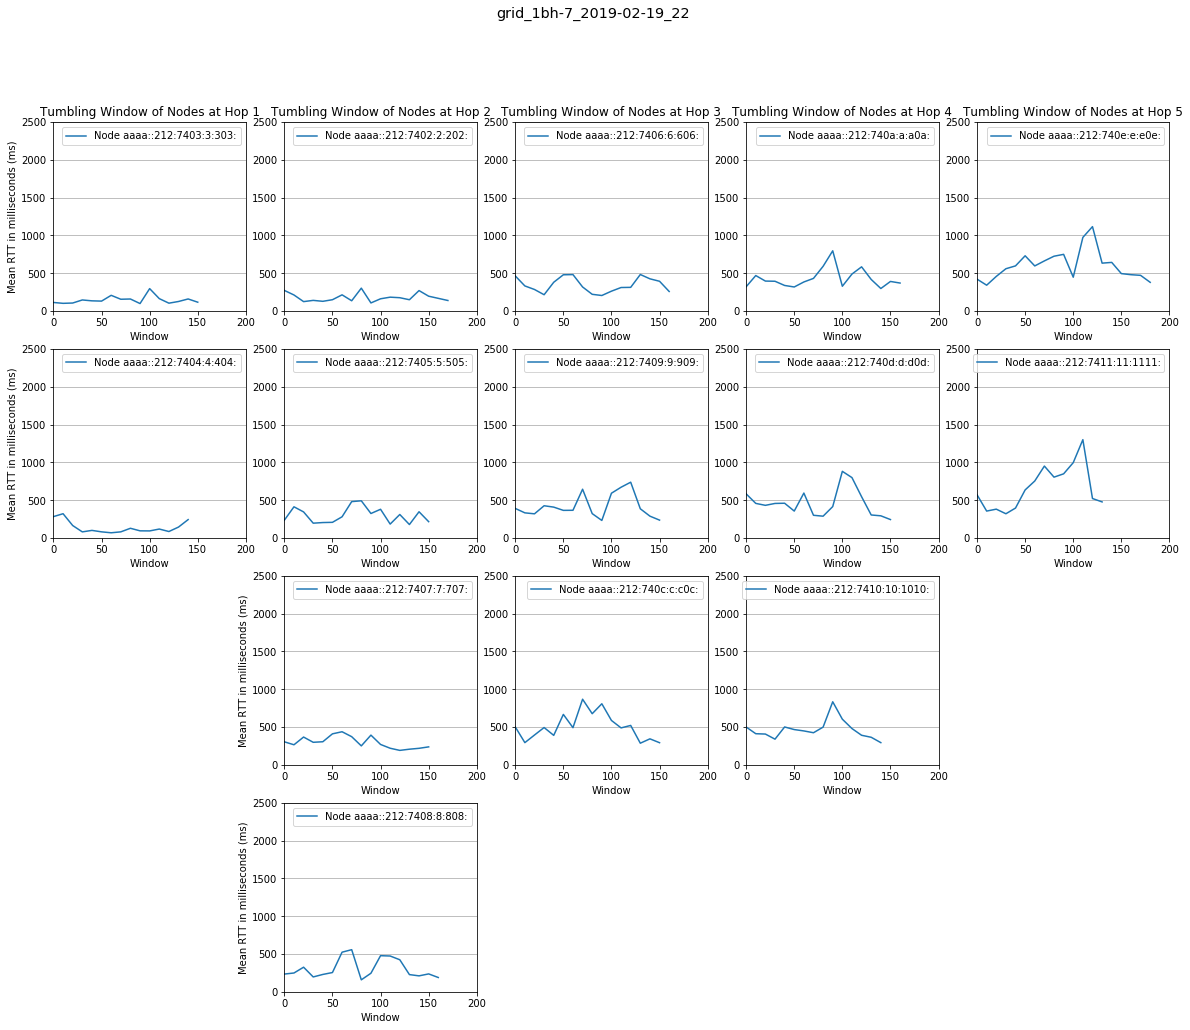

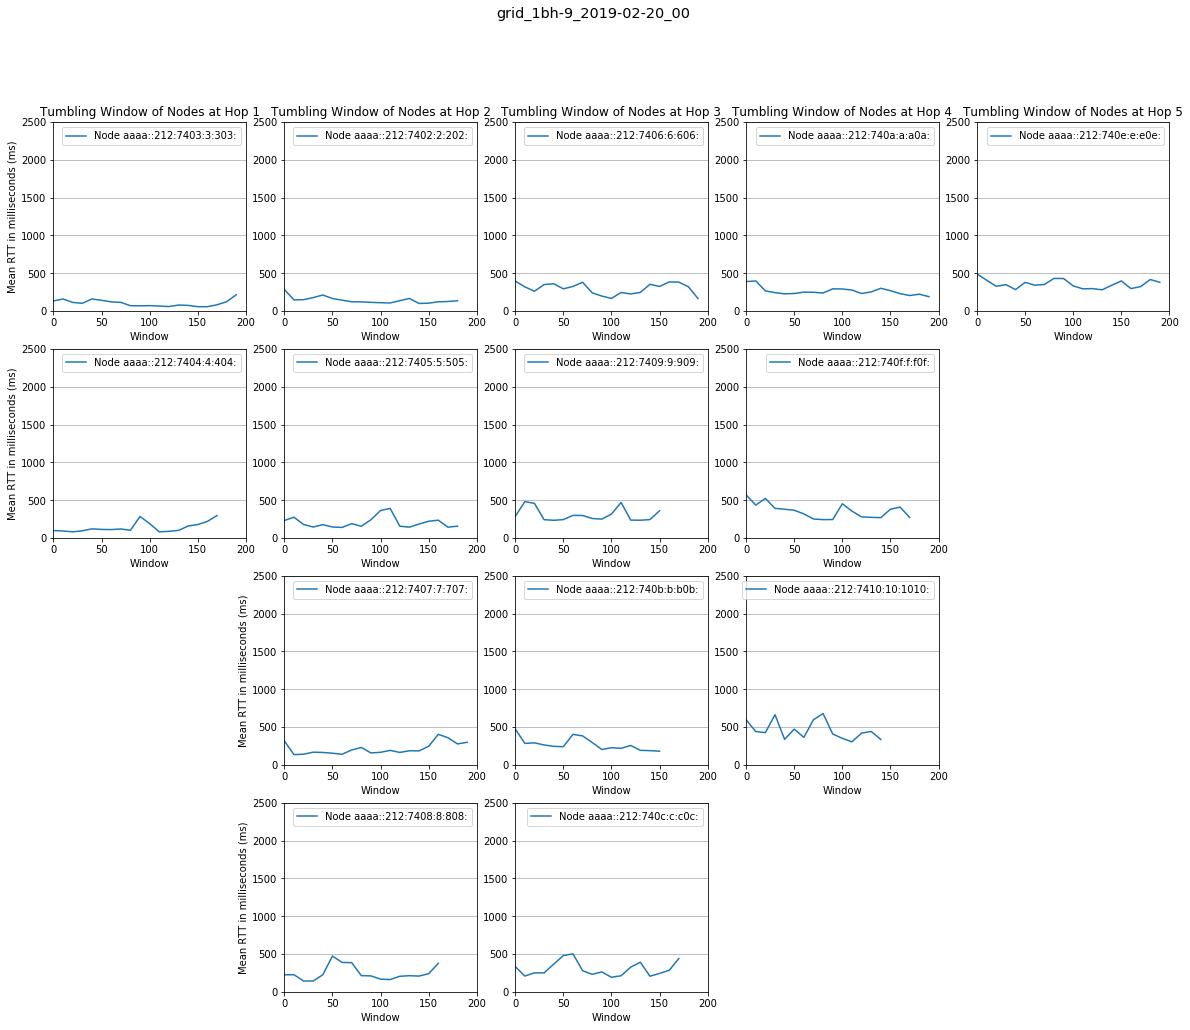

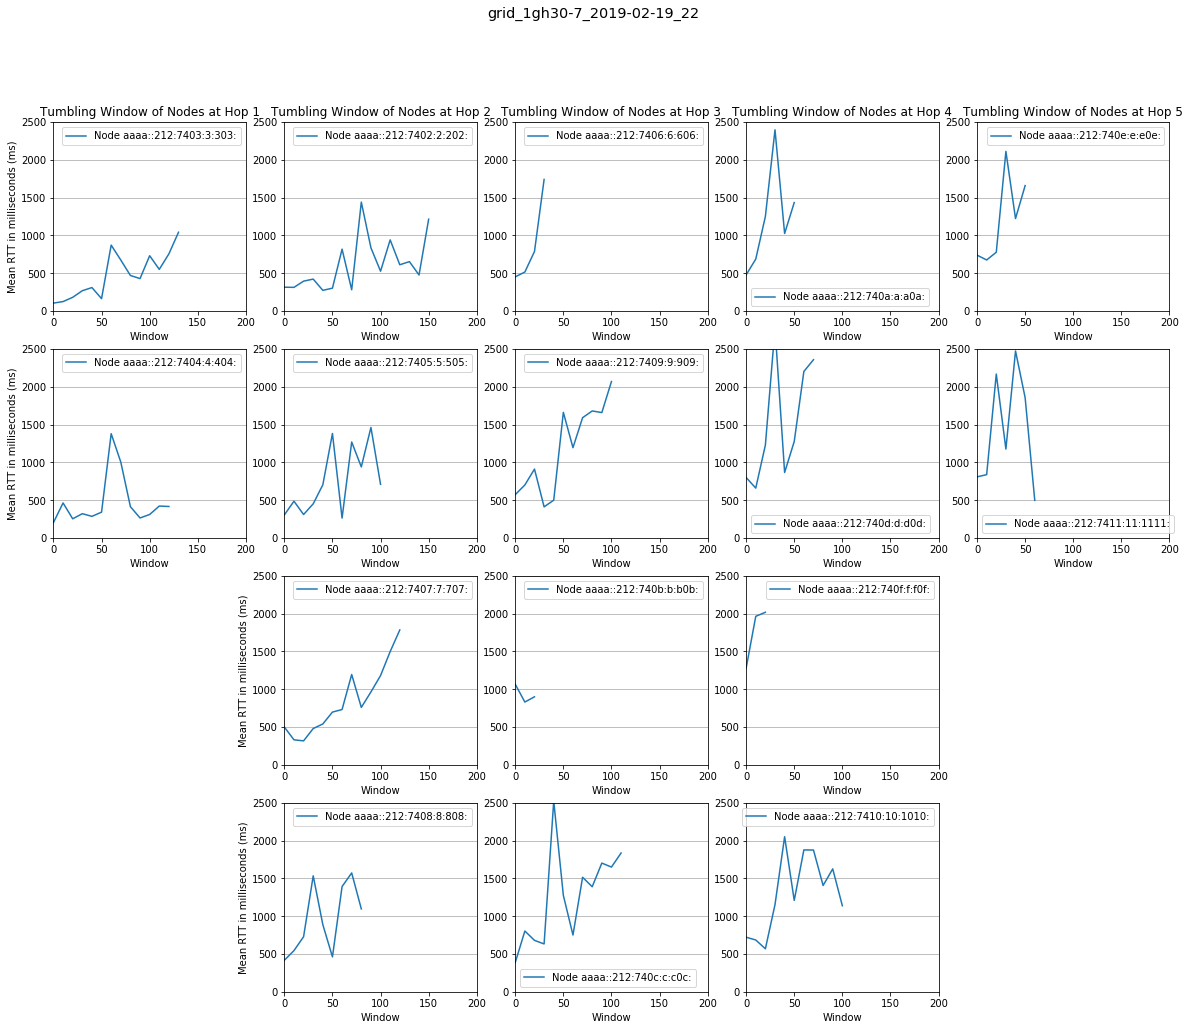

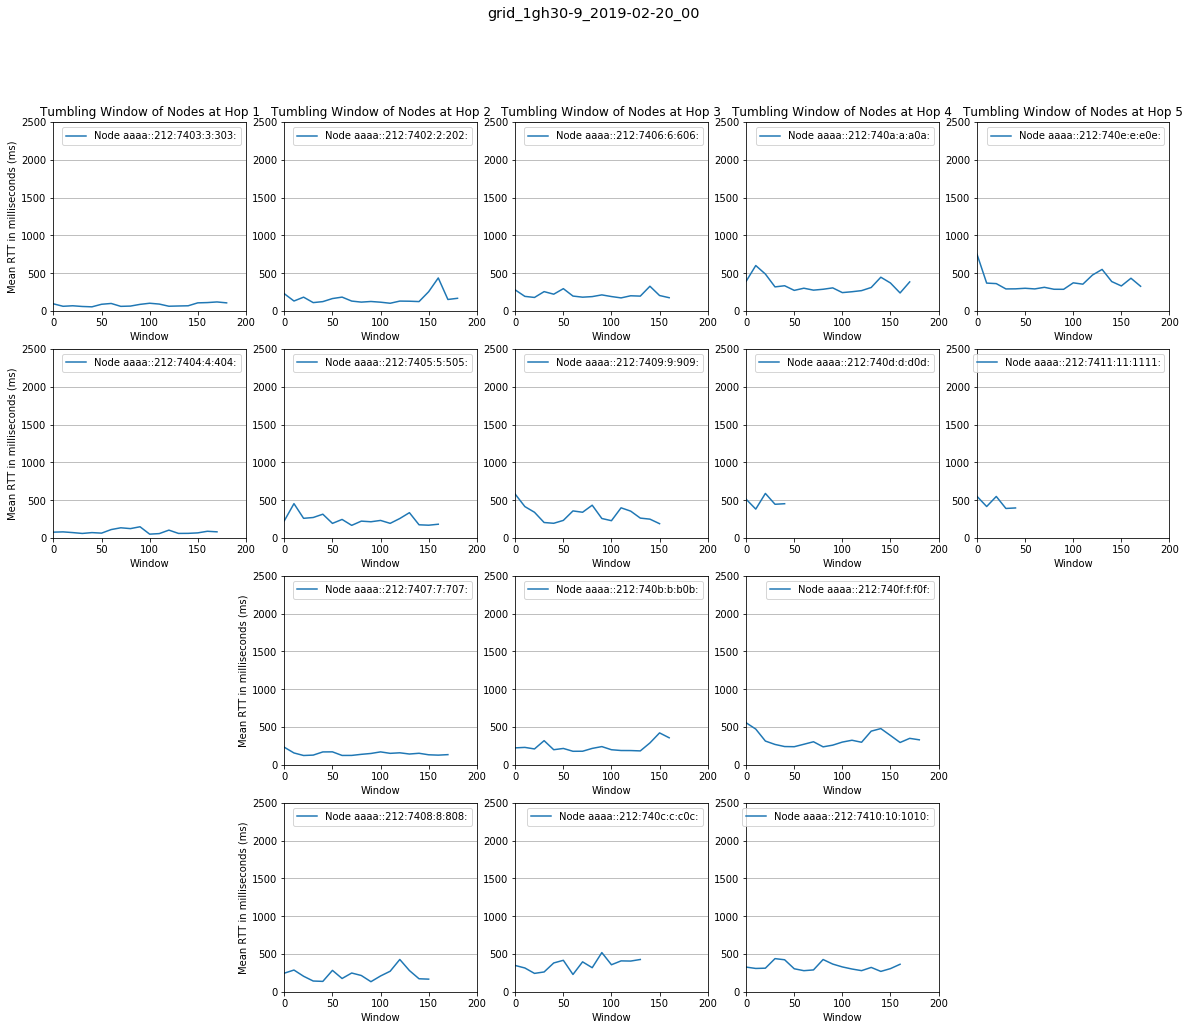

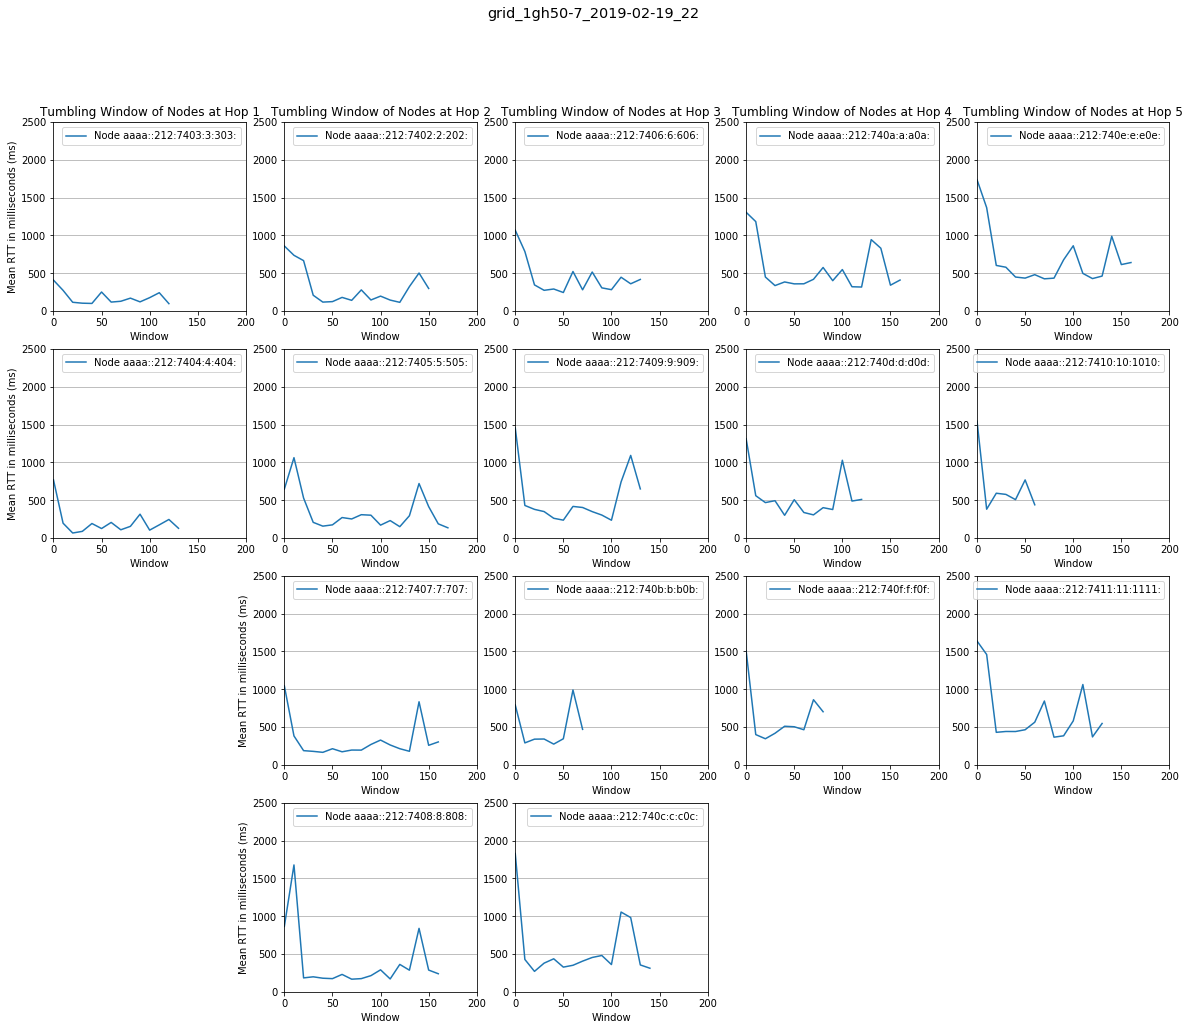

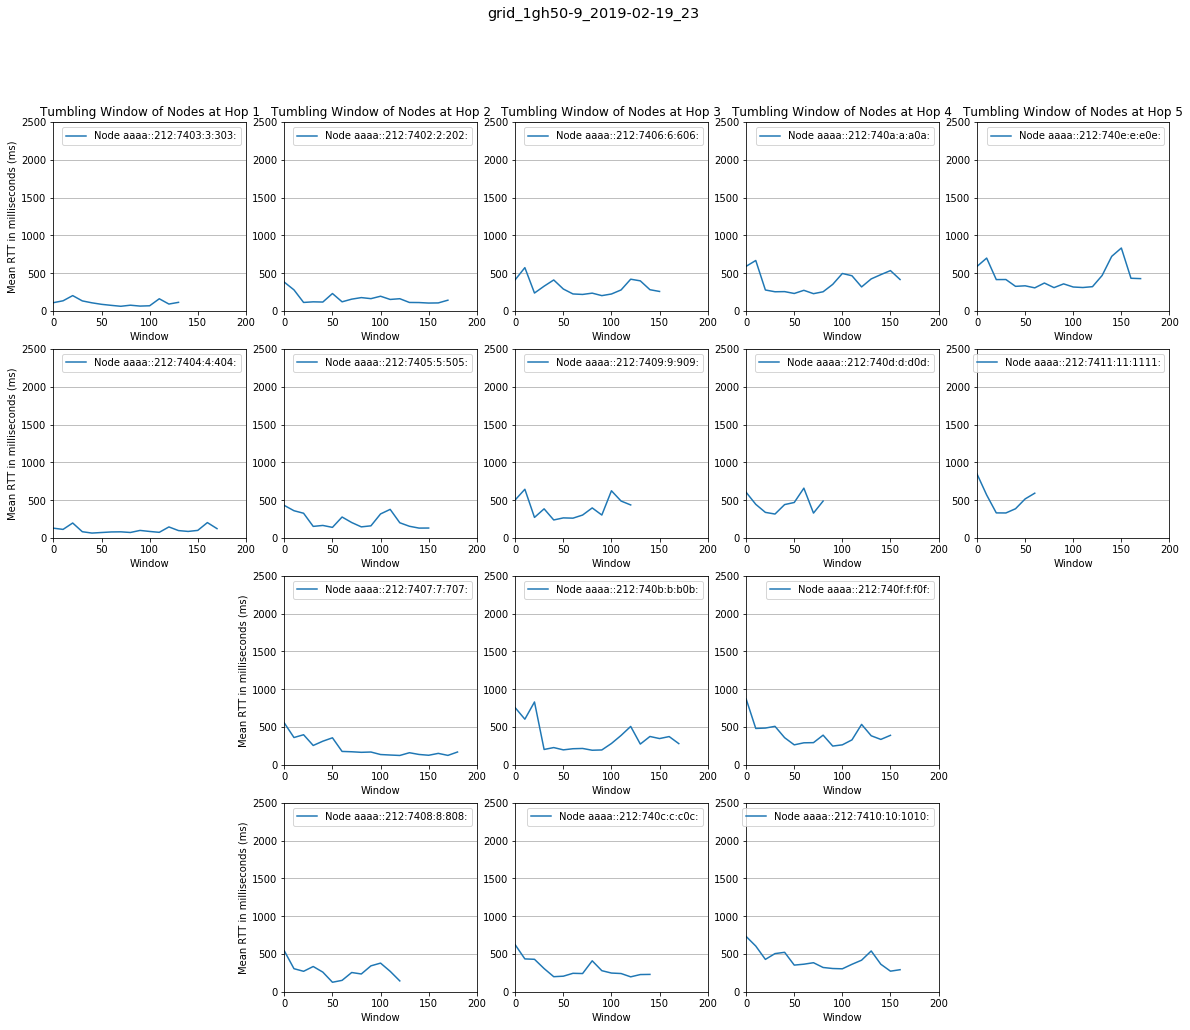

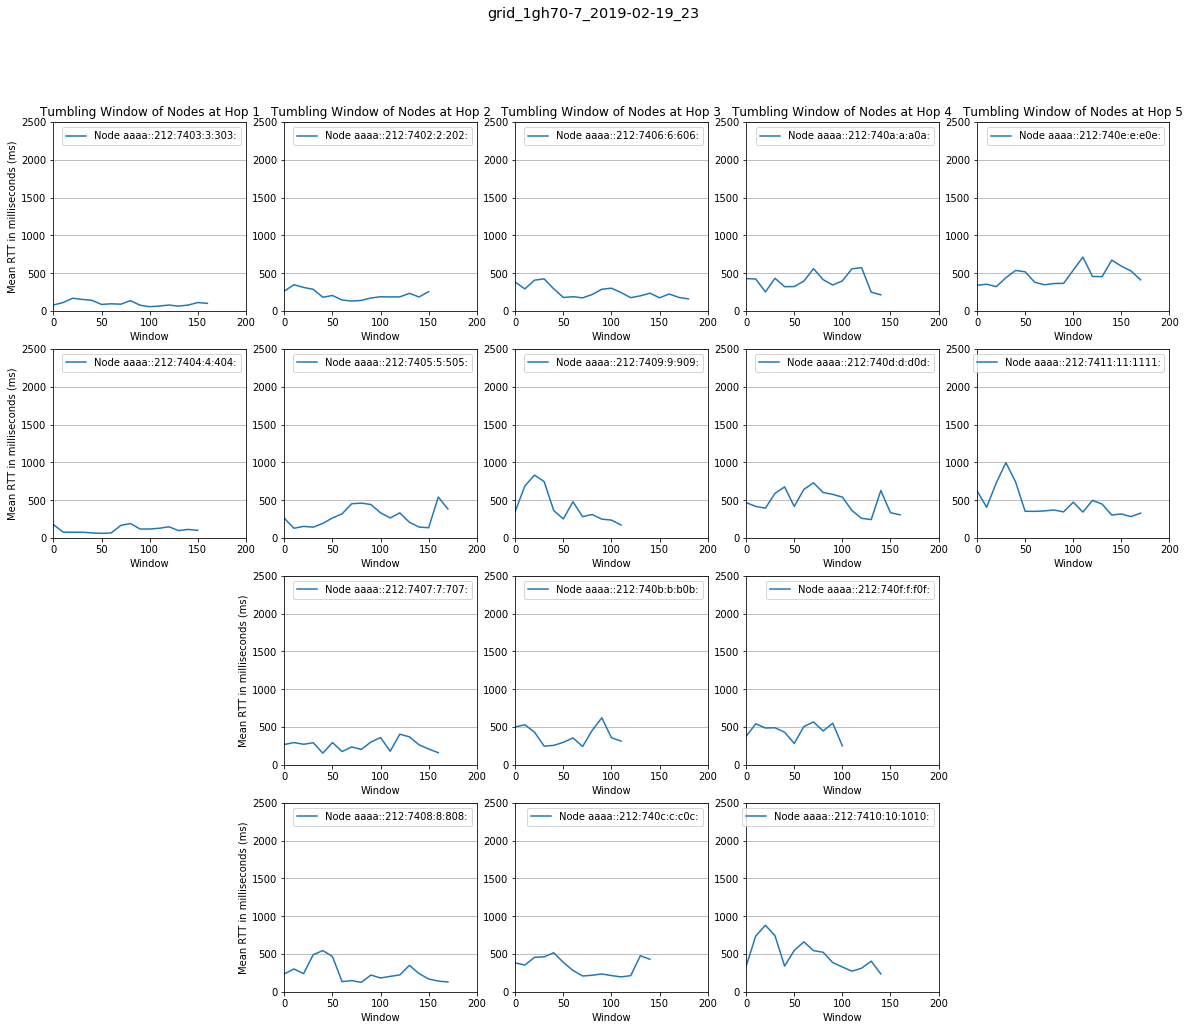

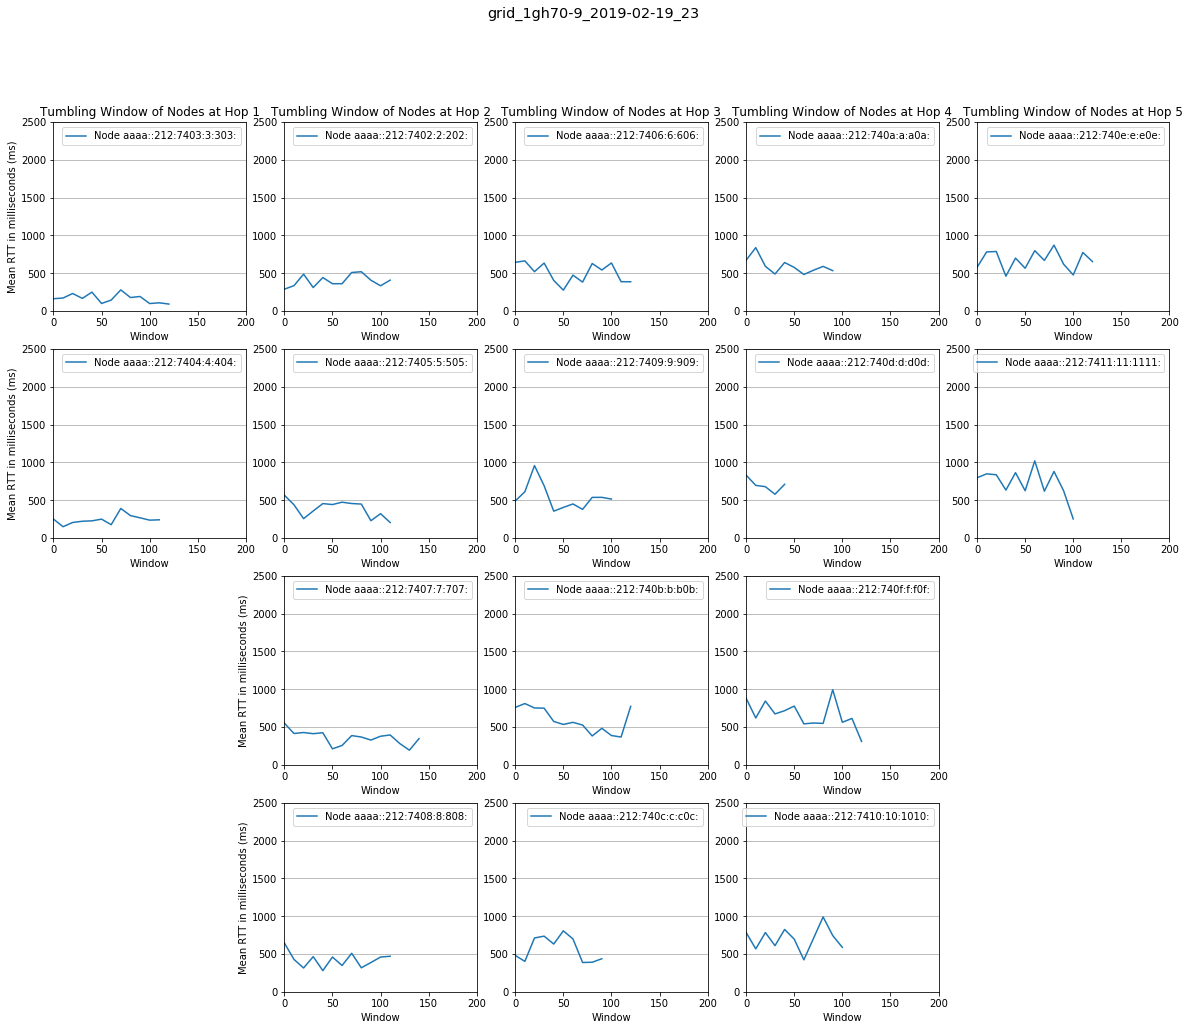

In [14]:
for row in plots:
    nodes, packets_node = trace_analysis.process_cooja2_traces(row[0], row[1])
    plots_analysis.plot_tumbling_windows_hops_nodes(nodes, packets_node, 200, 2500, row[1], 10)


Outliers => points our of mean-2std <= x(t) <= mean + 2std

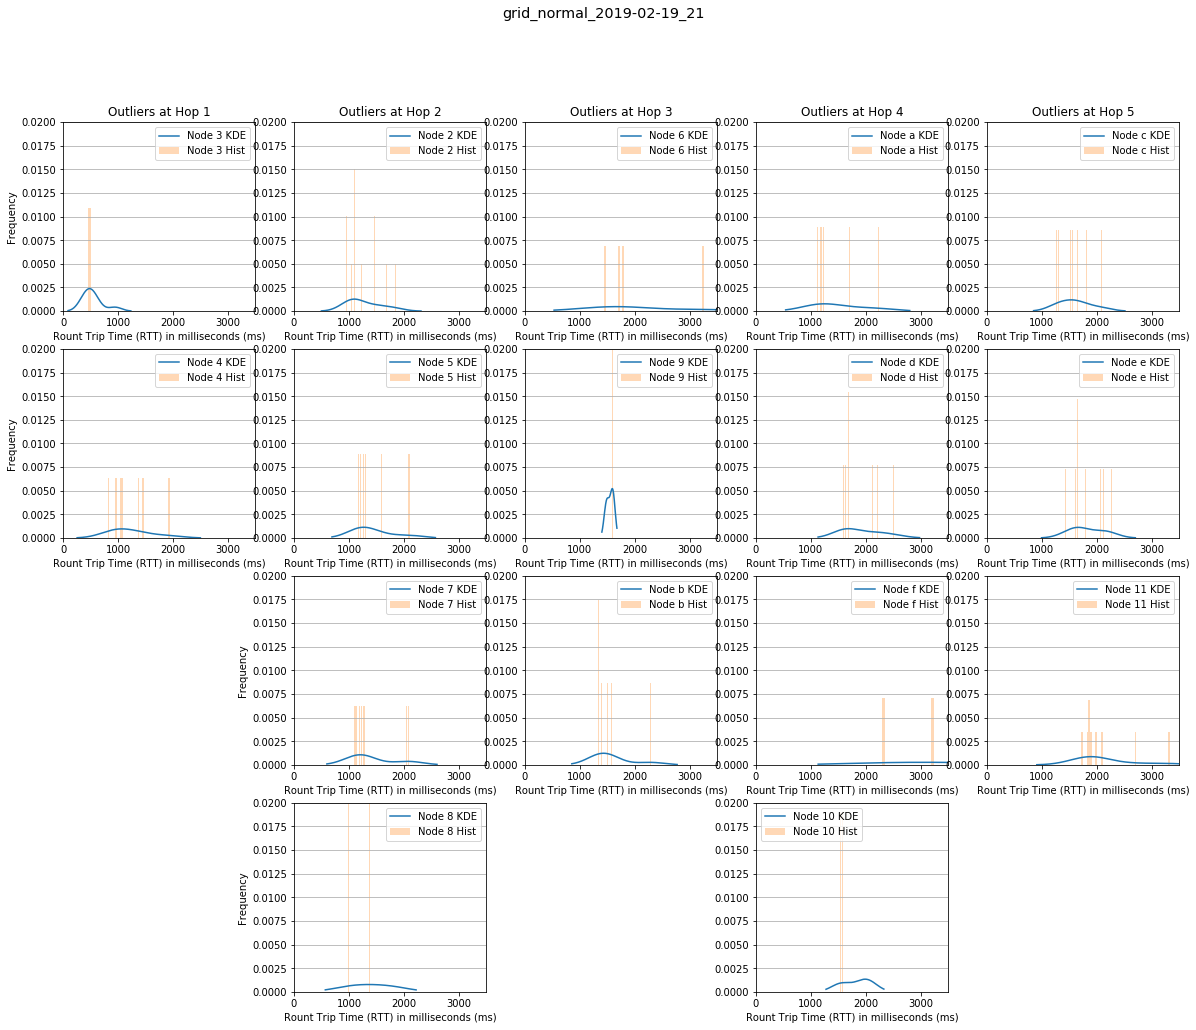

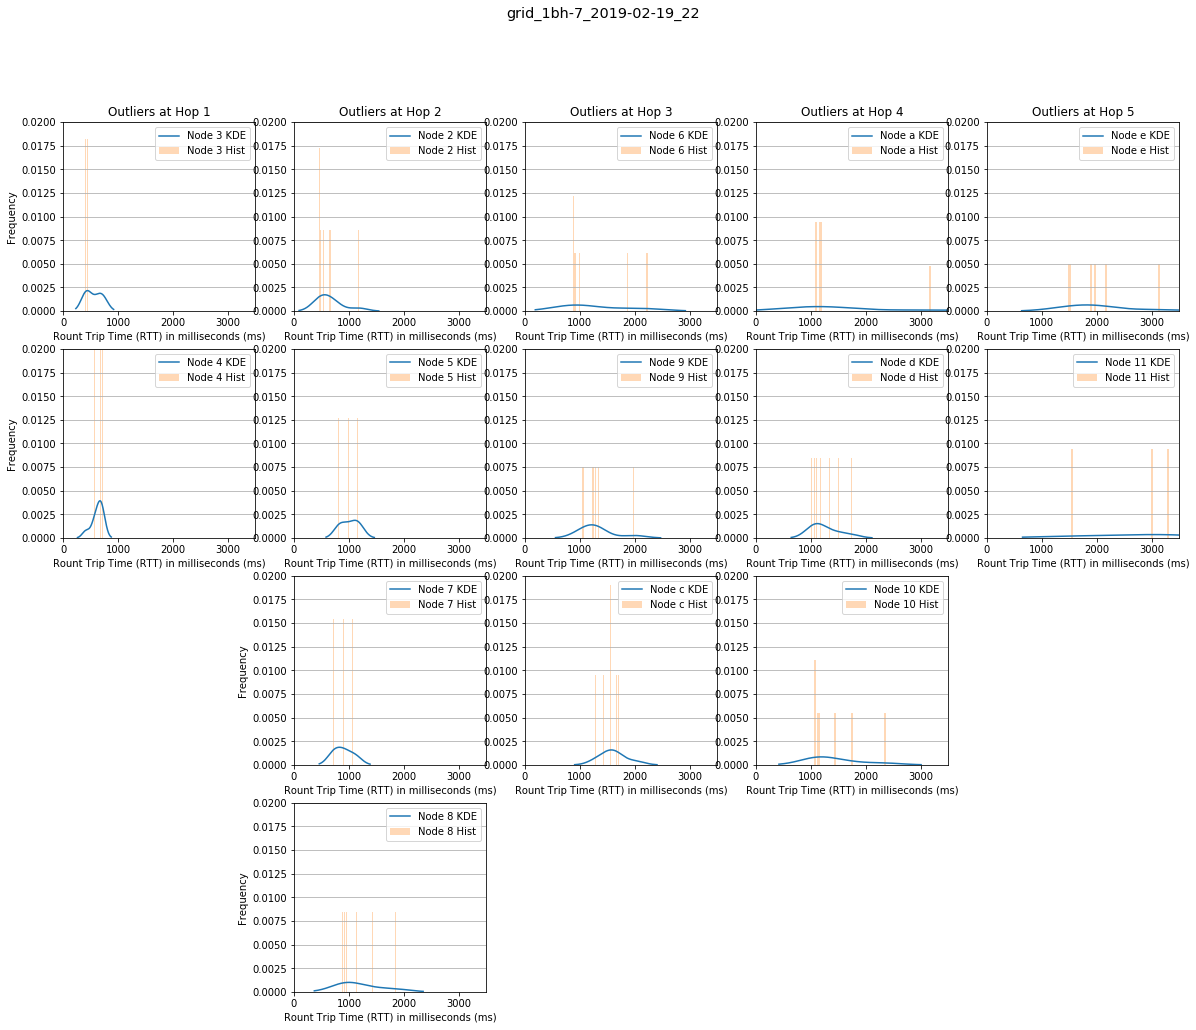

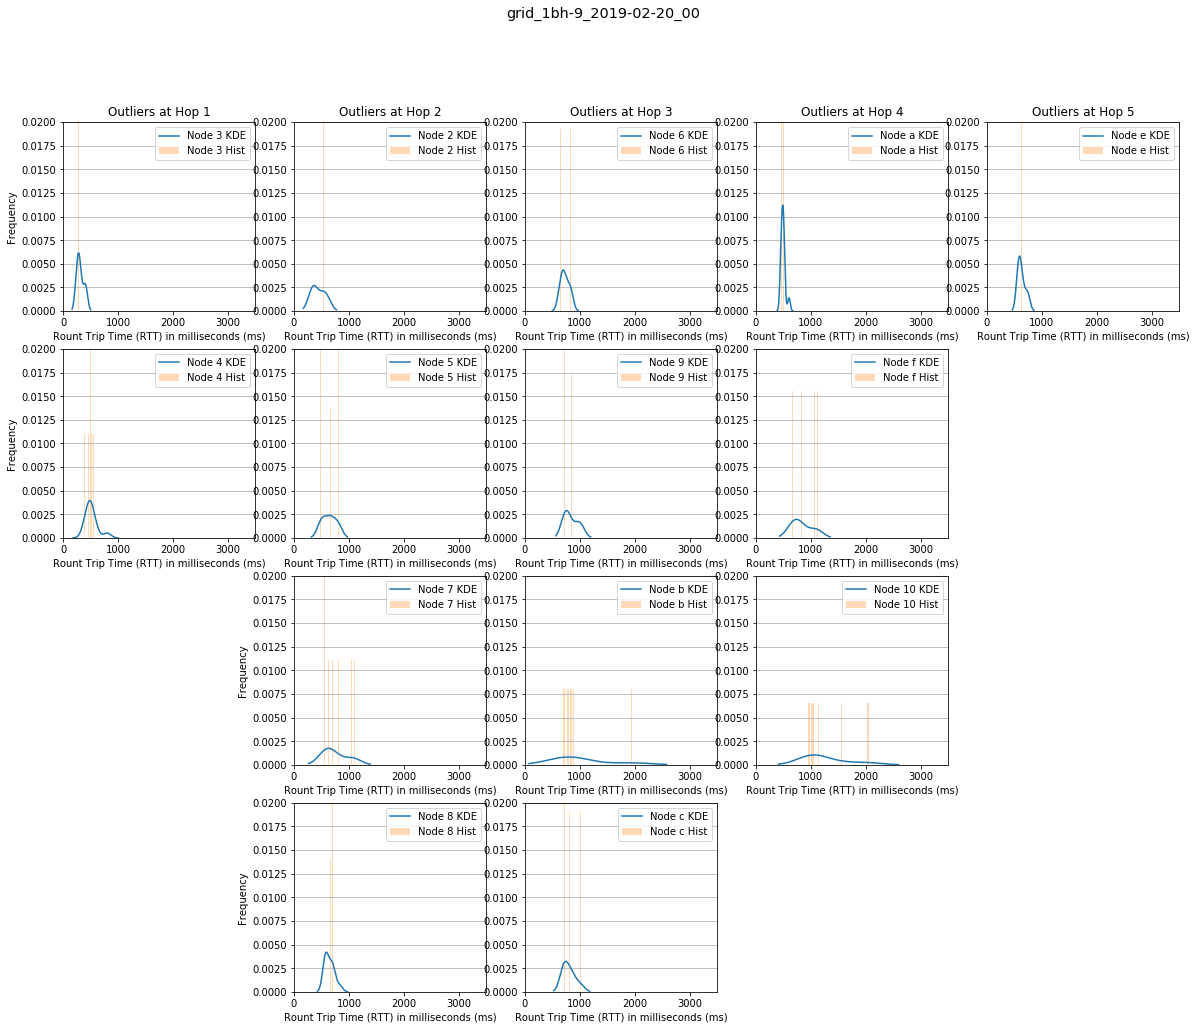

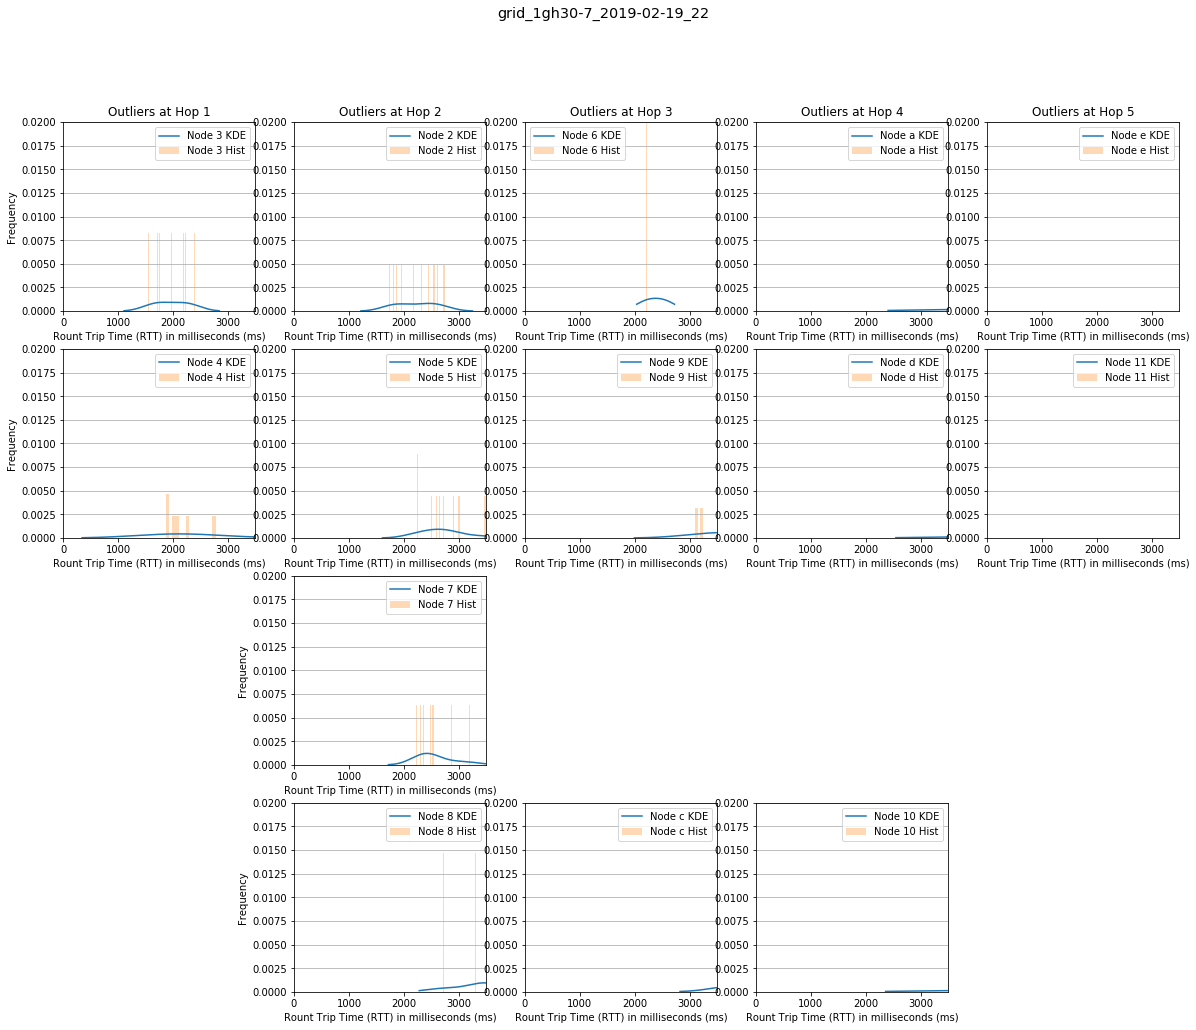

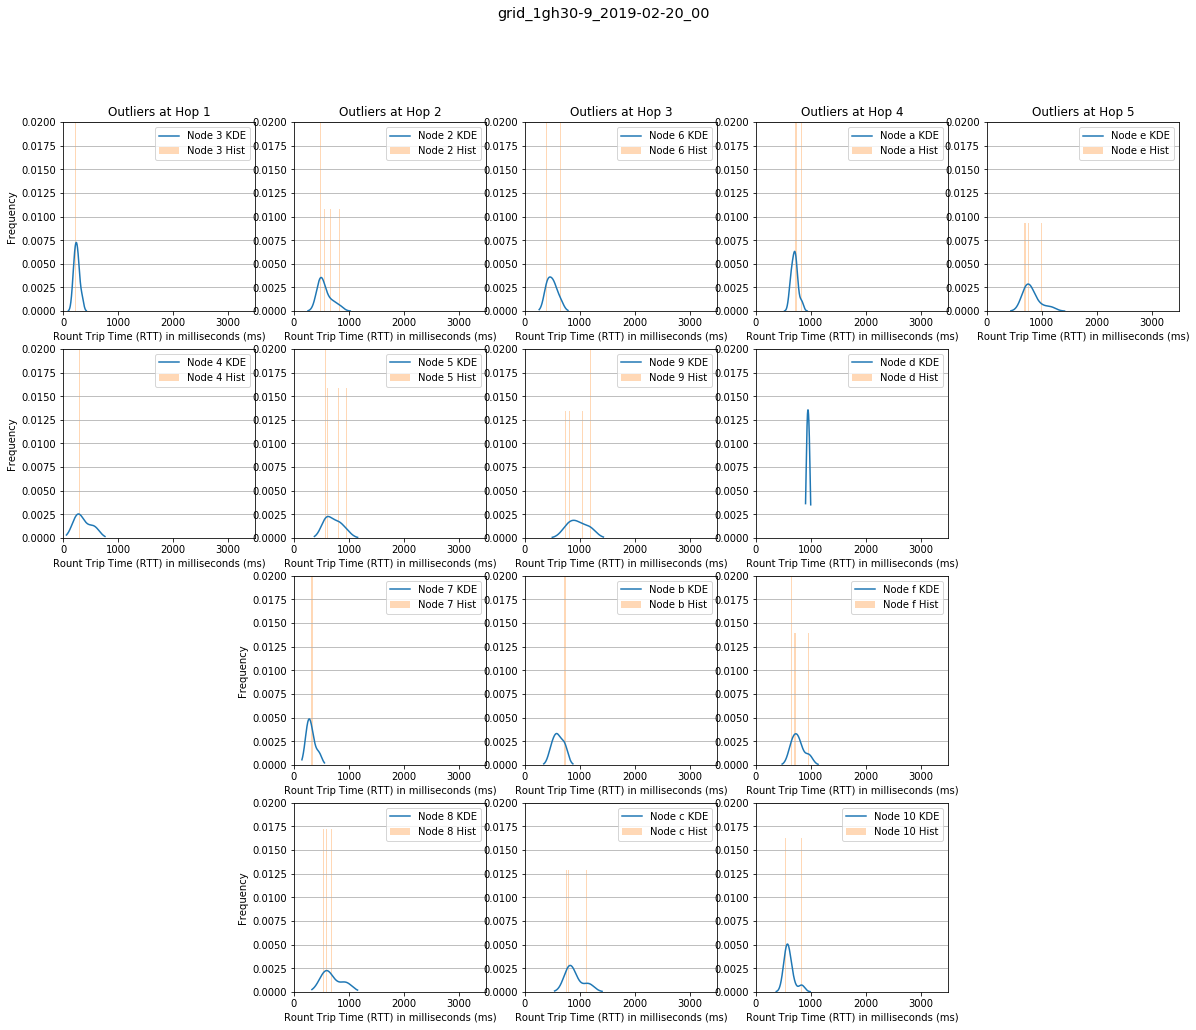

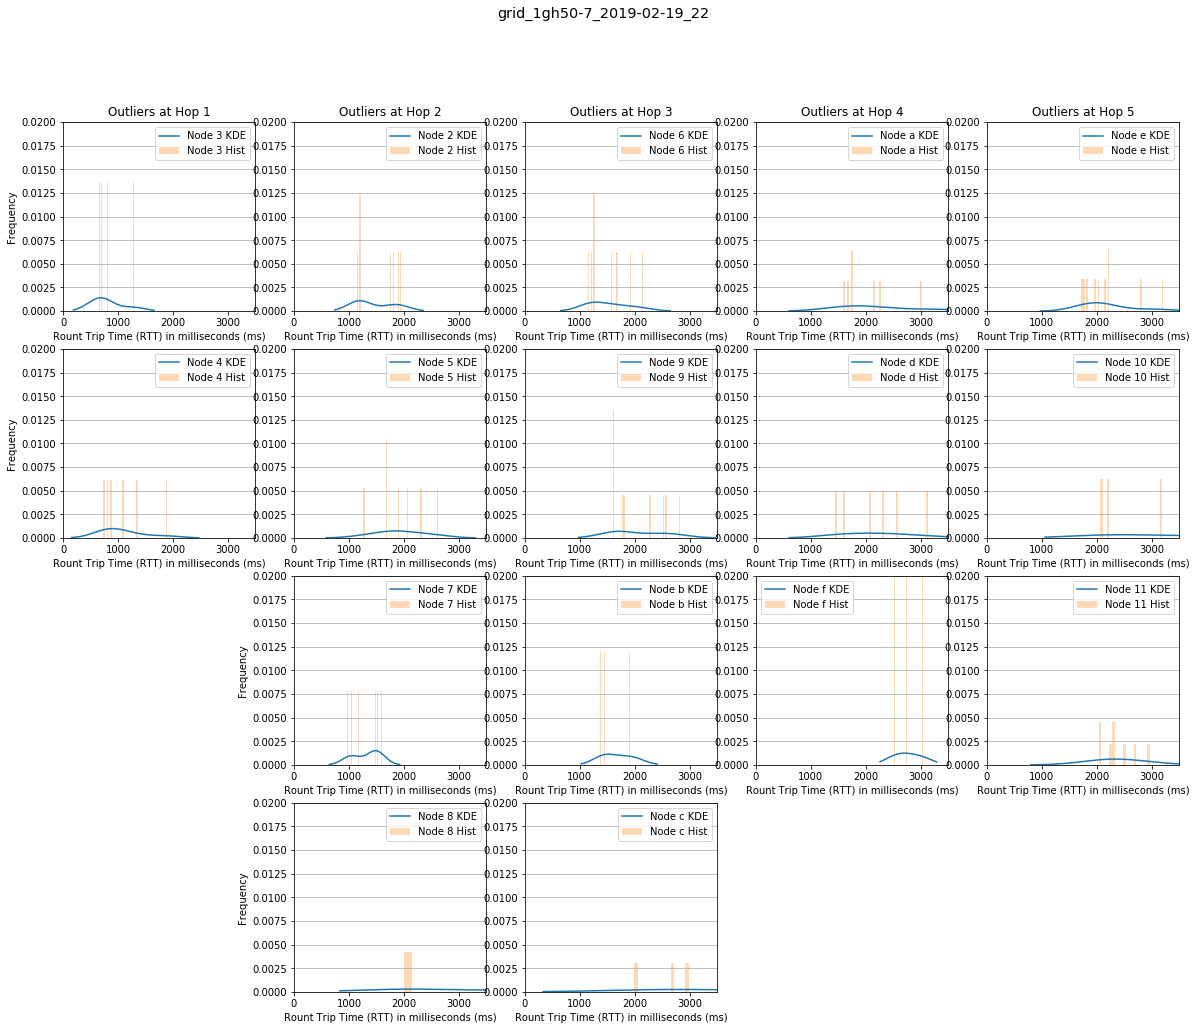

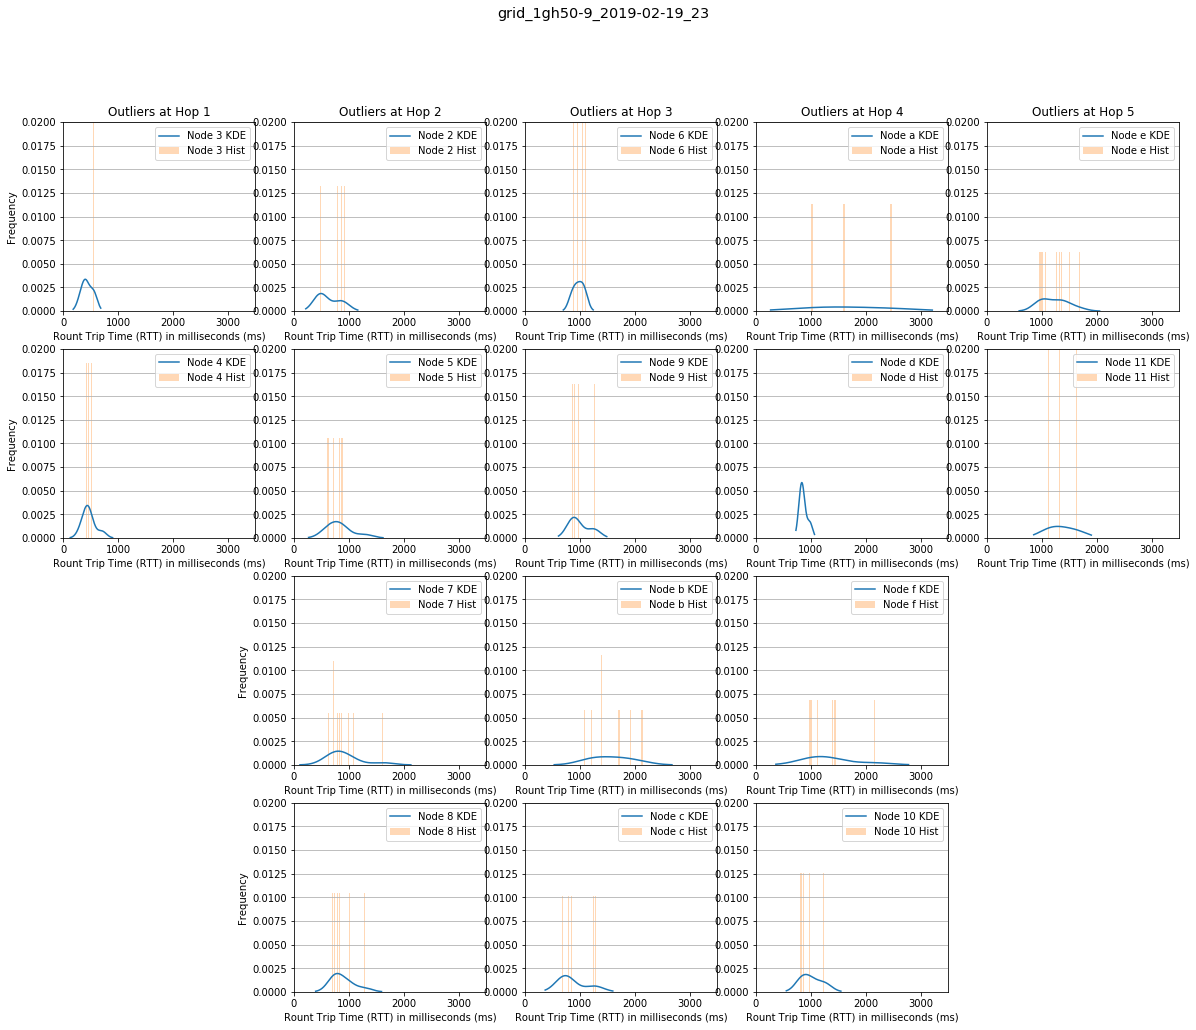

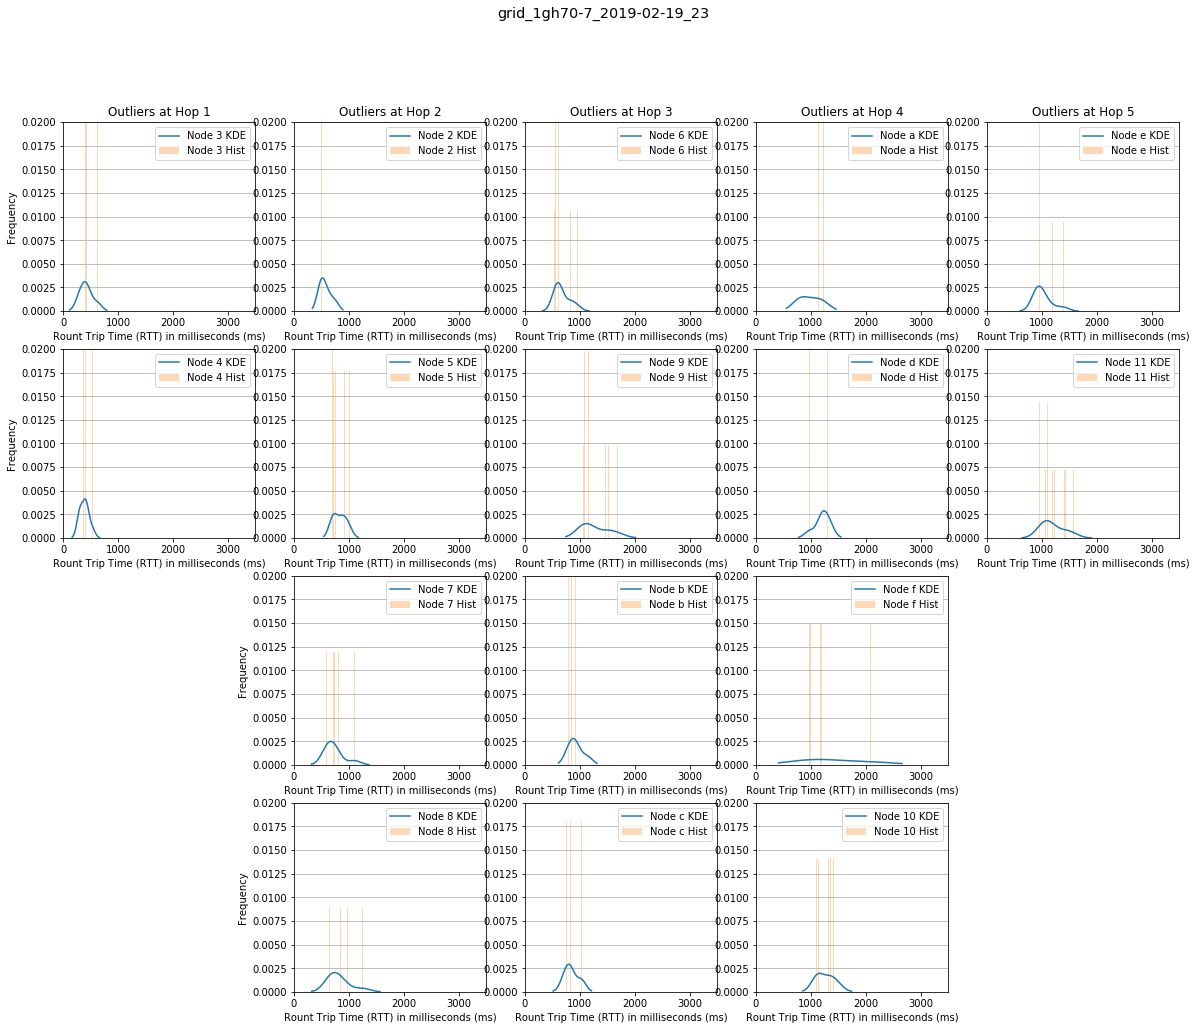

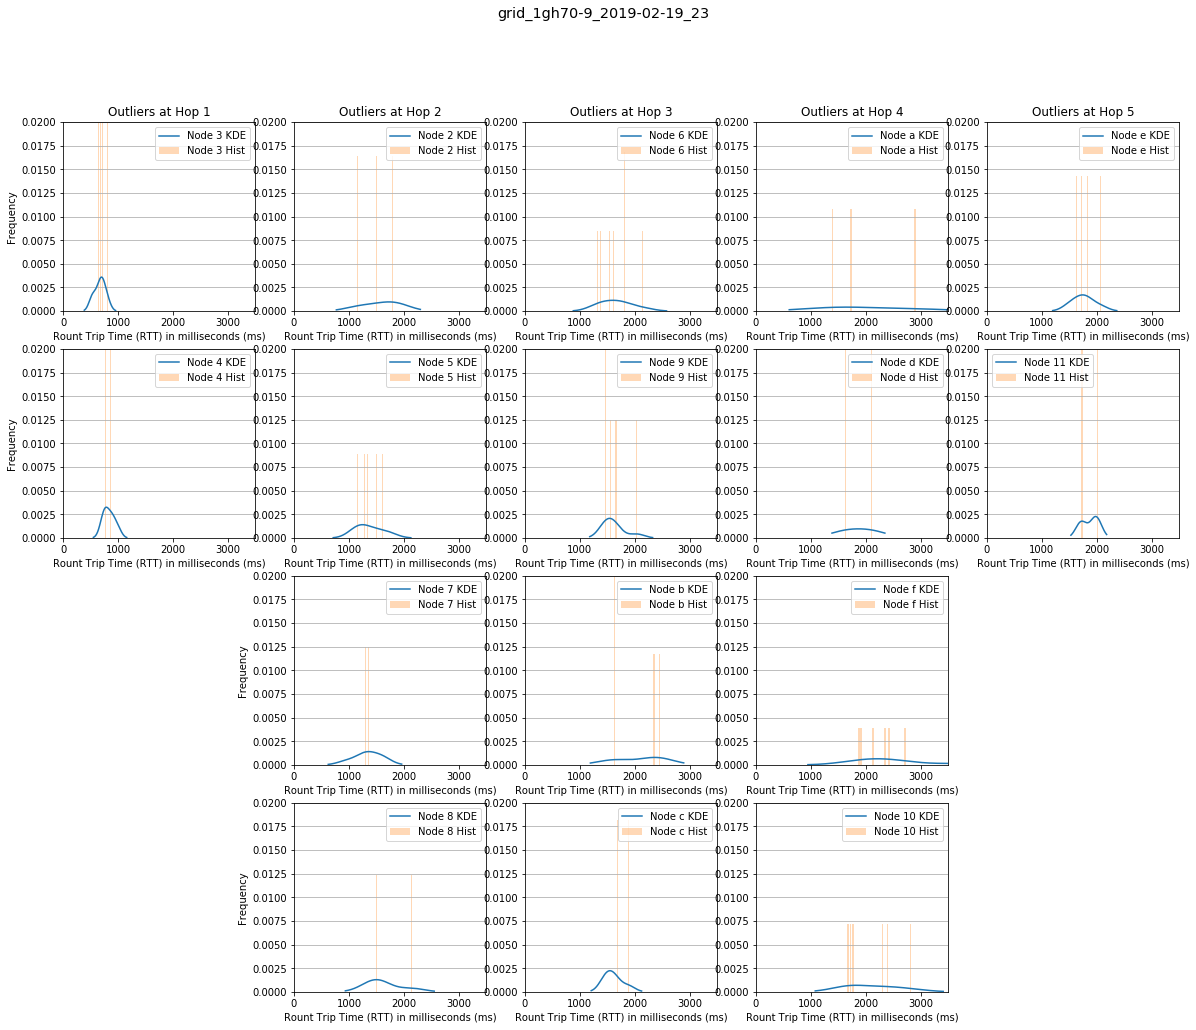

In [4]:
for row in plots:
    nodes, packets_node = trace_analysis.process_cooja2_traces(row[0], row[1])
    outliers = trace_analysis.compute_outliers_by_node(packets_node)
    plots_analysis.plot_histograms_outliers_hops_nodes(nodes, outliers, 3500, 0.02, row[1])

IQR outliers

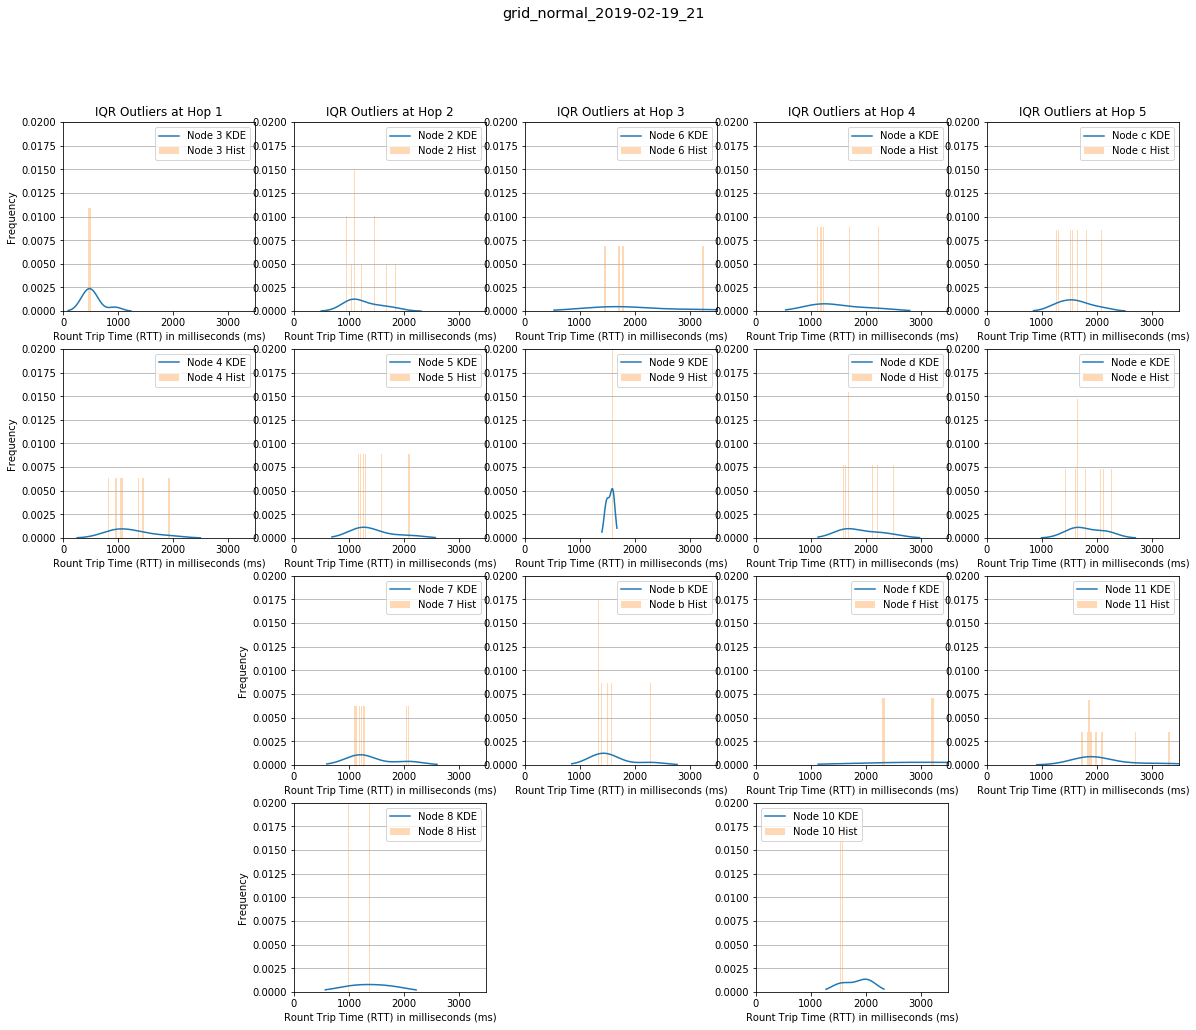

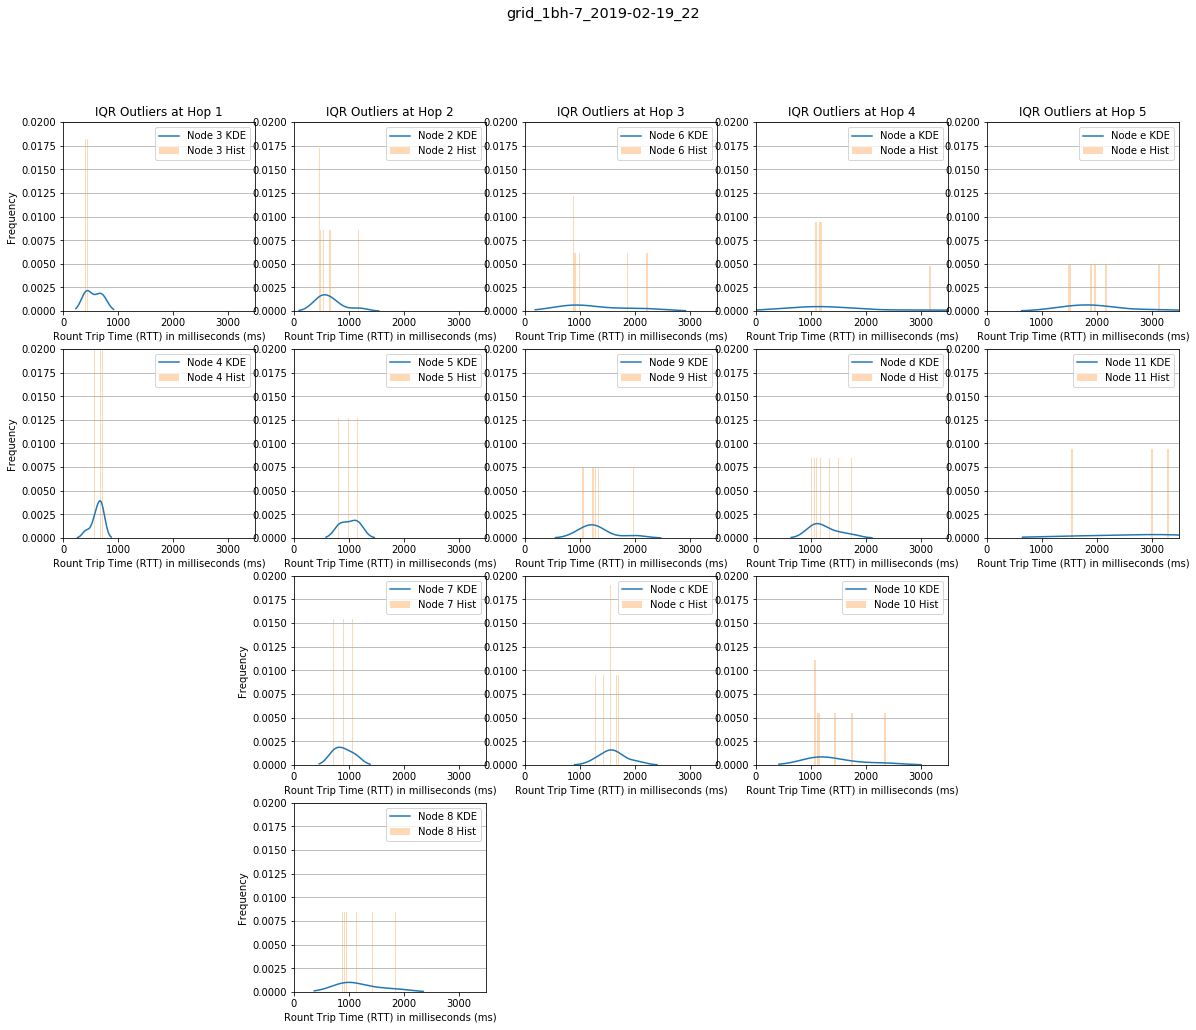

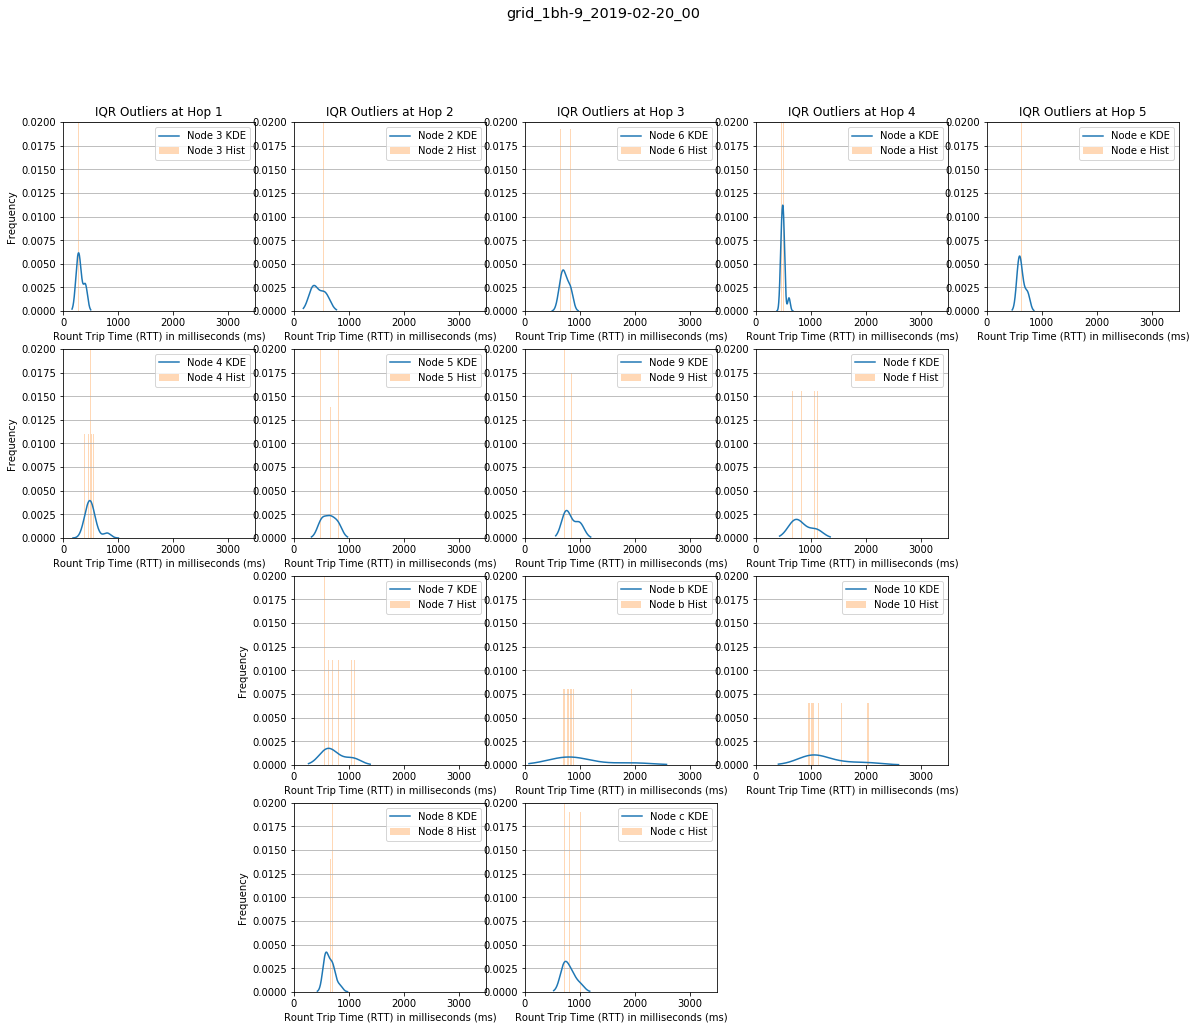

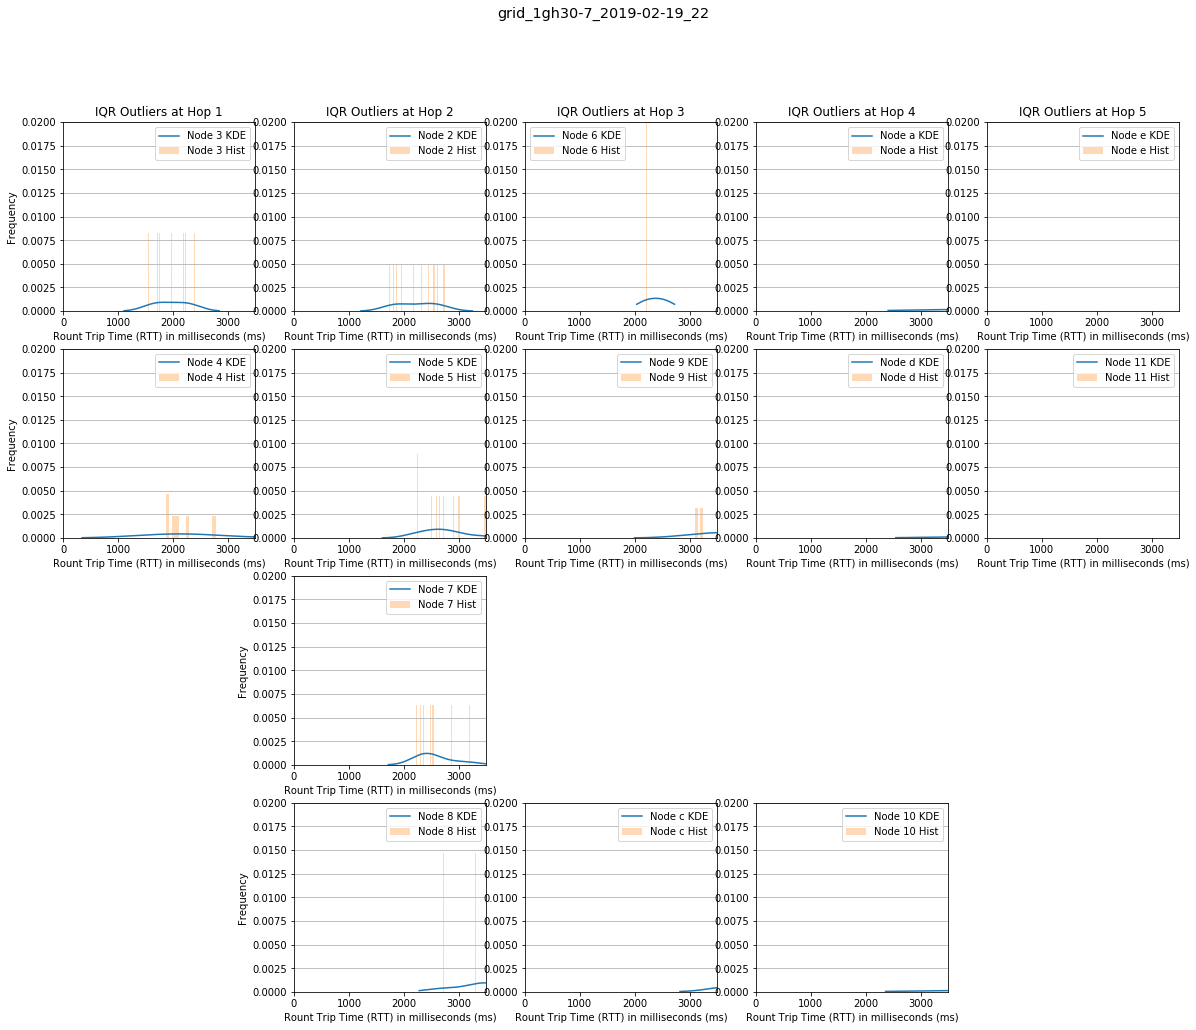

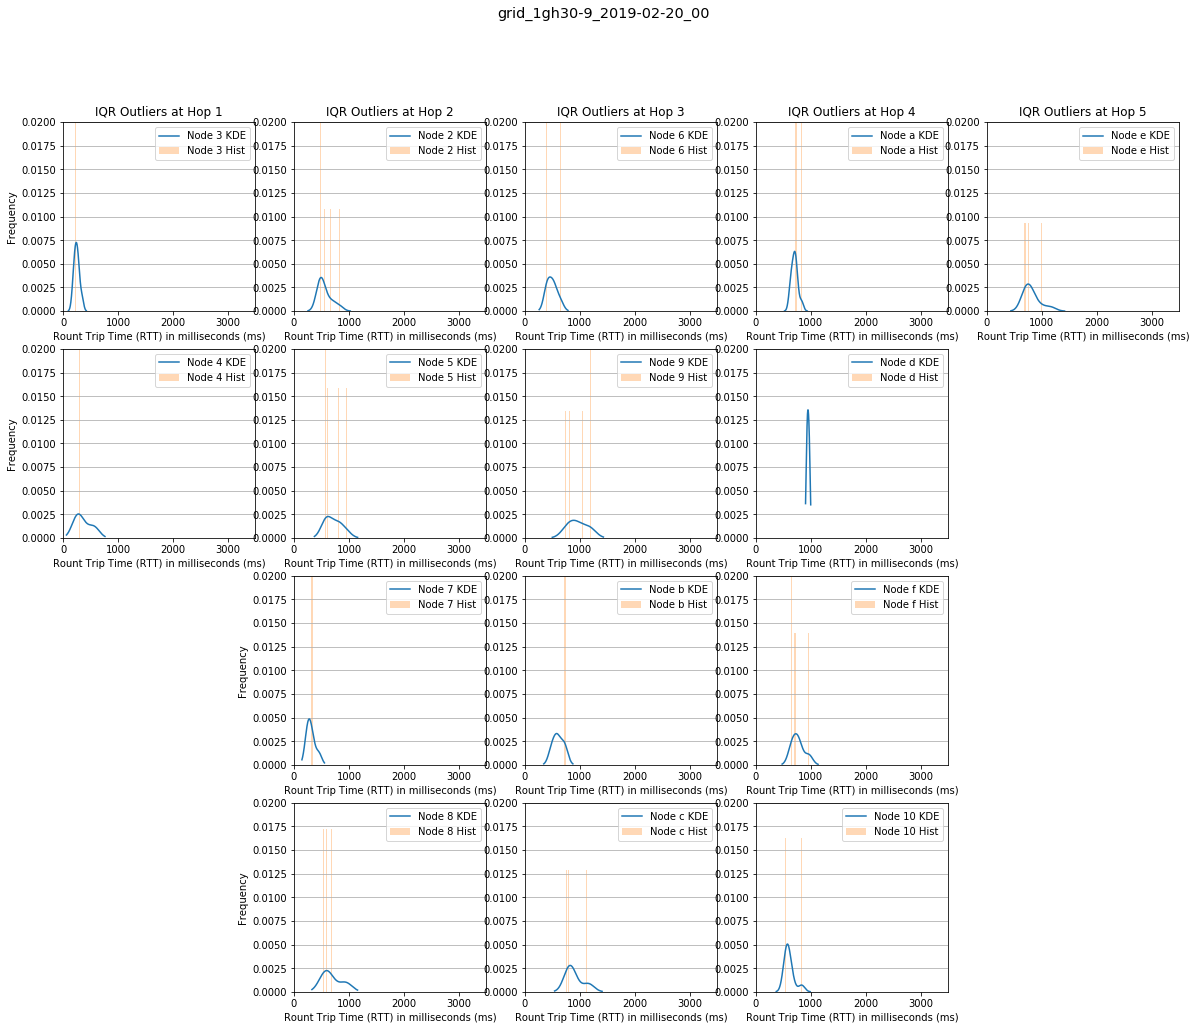

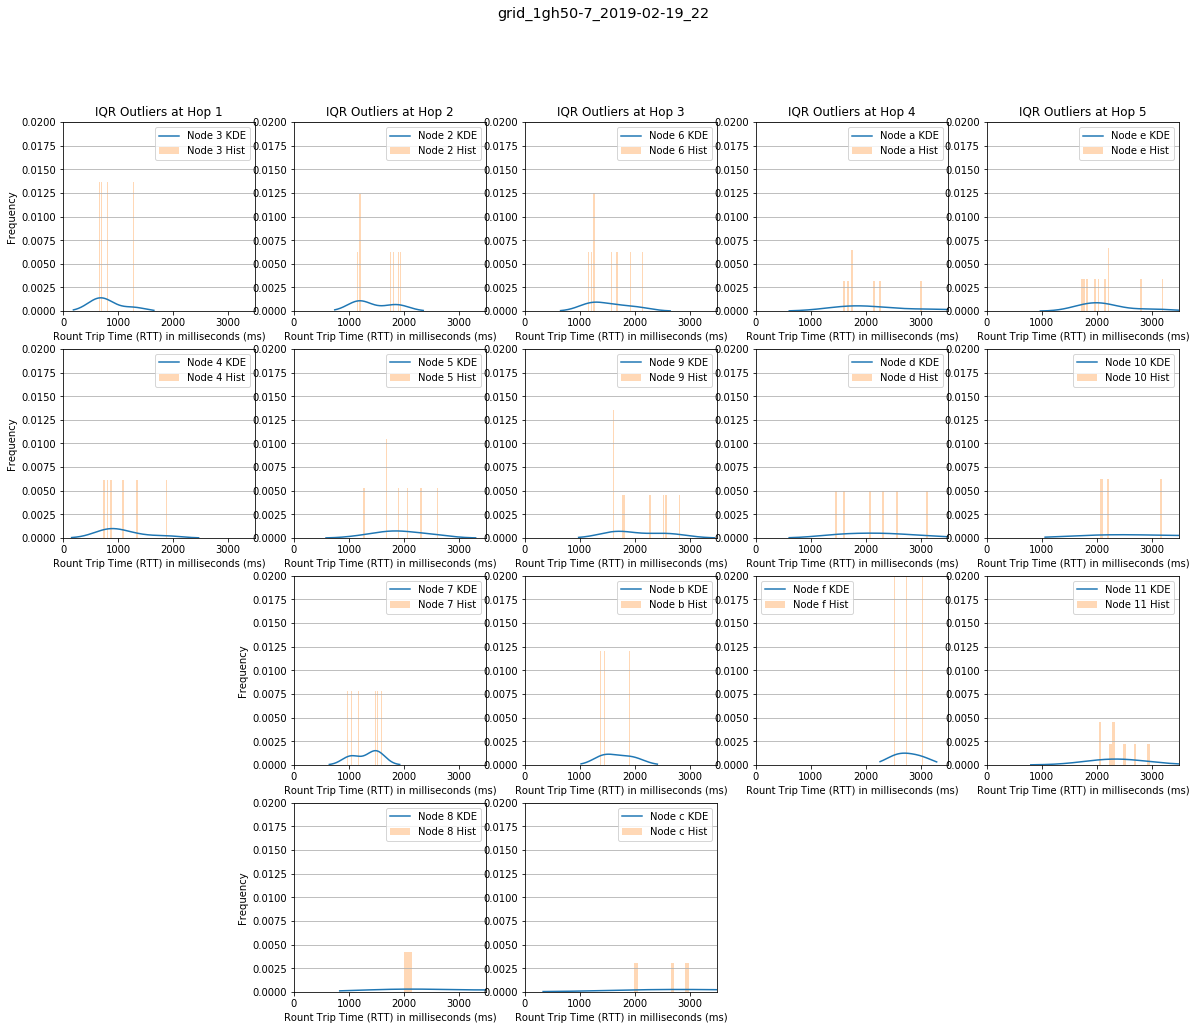

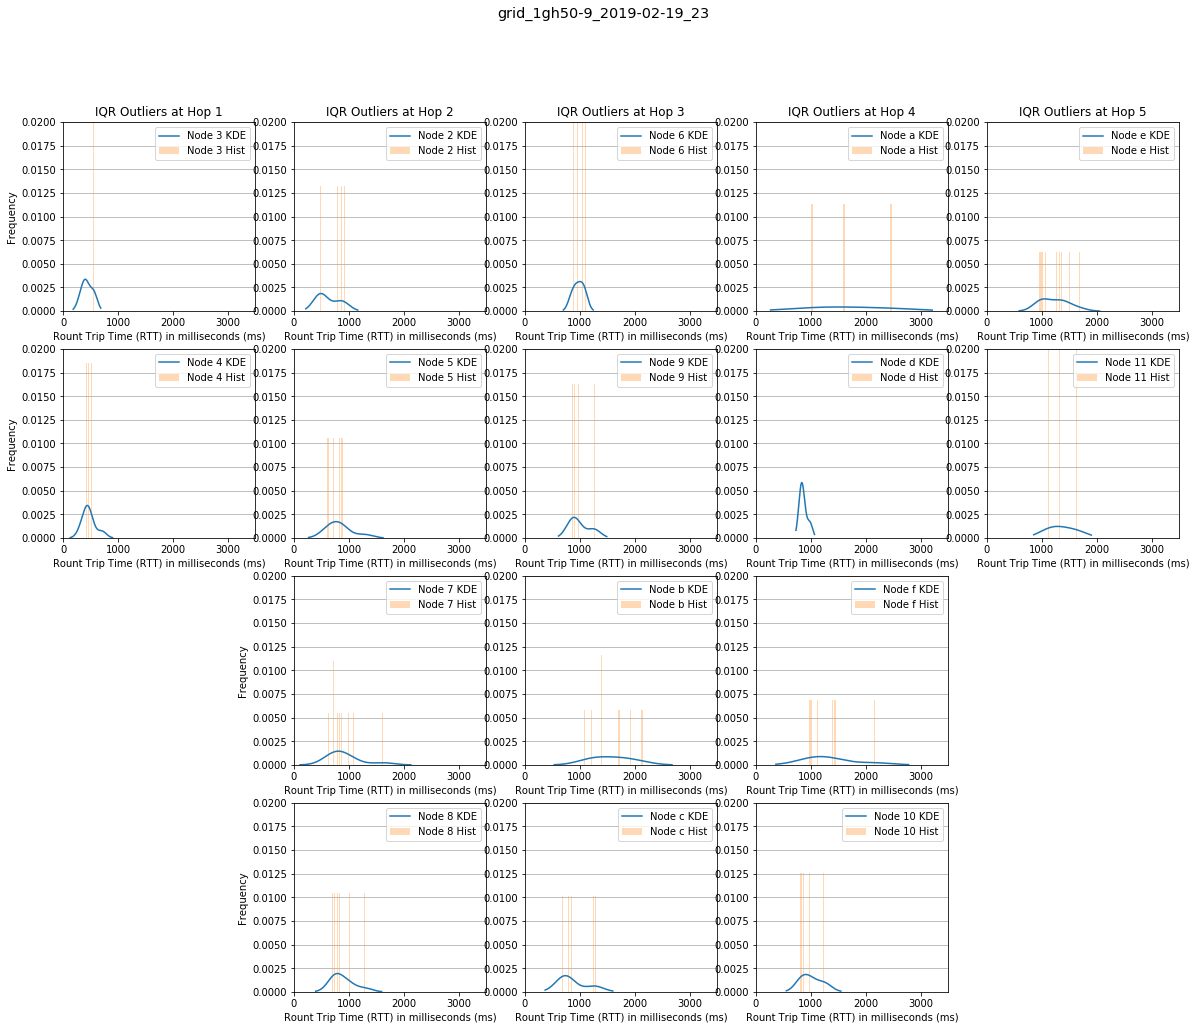

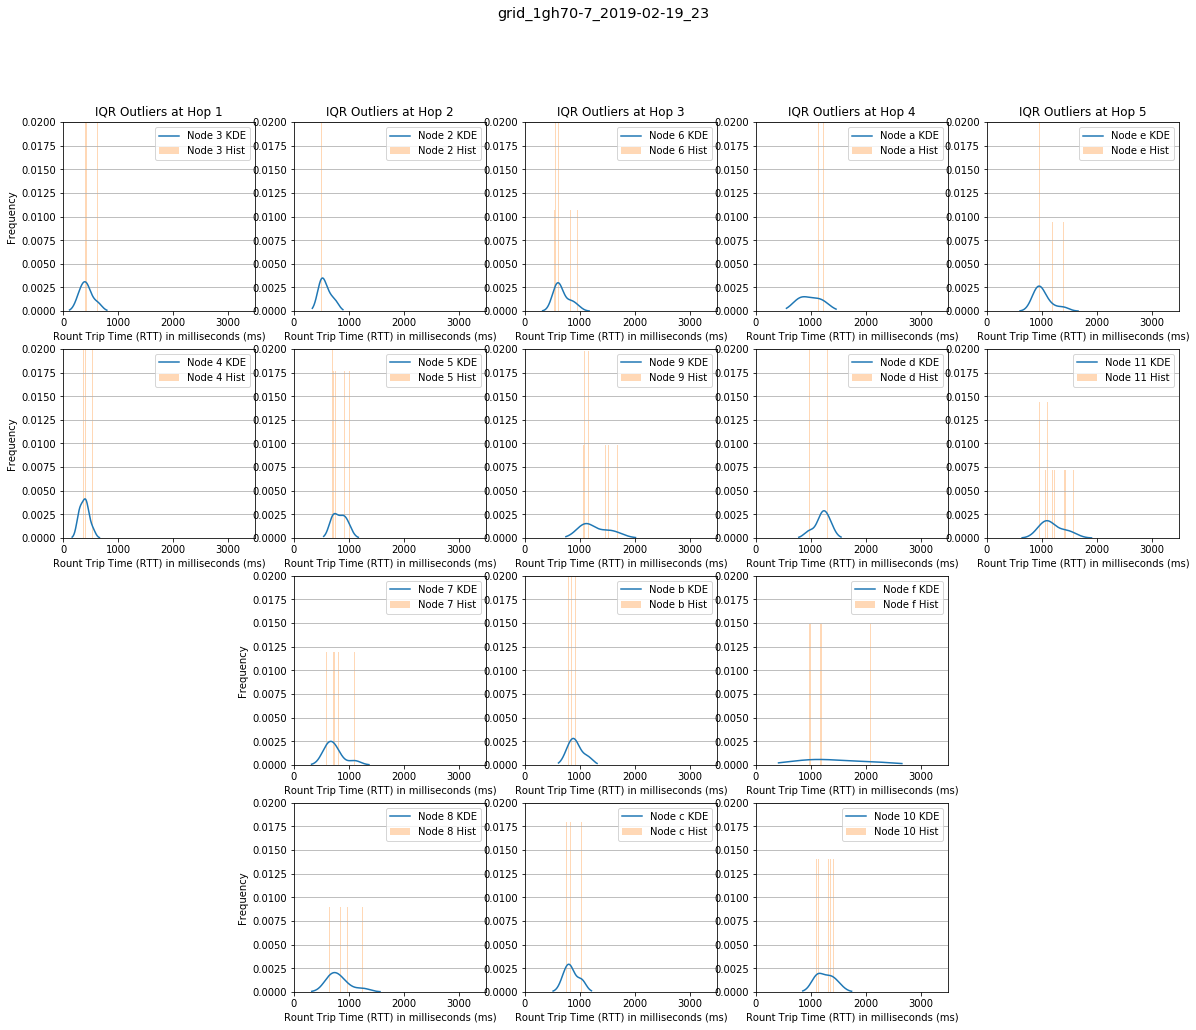

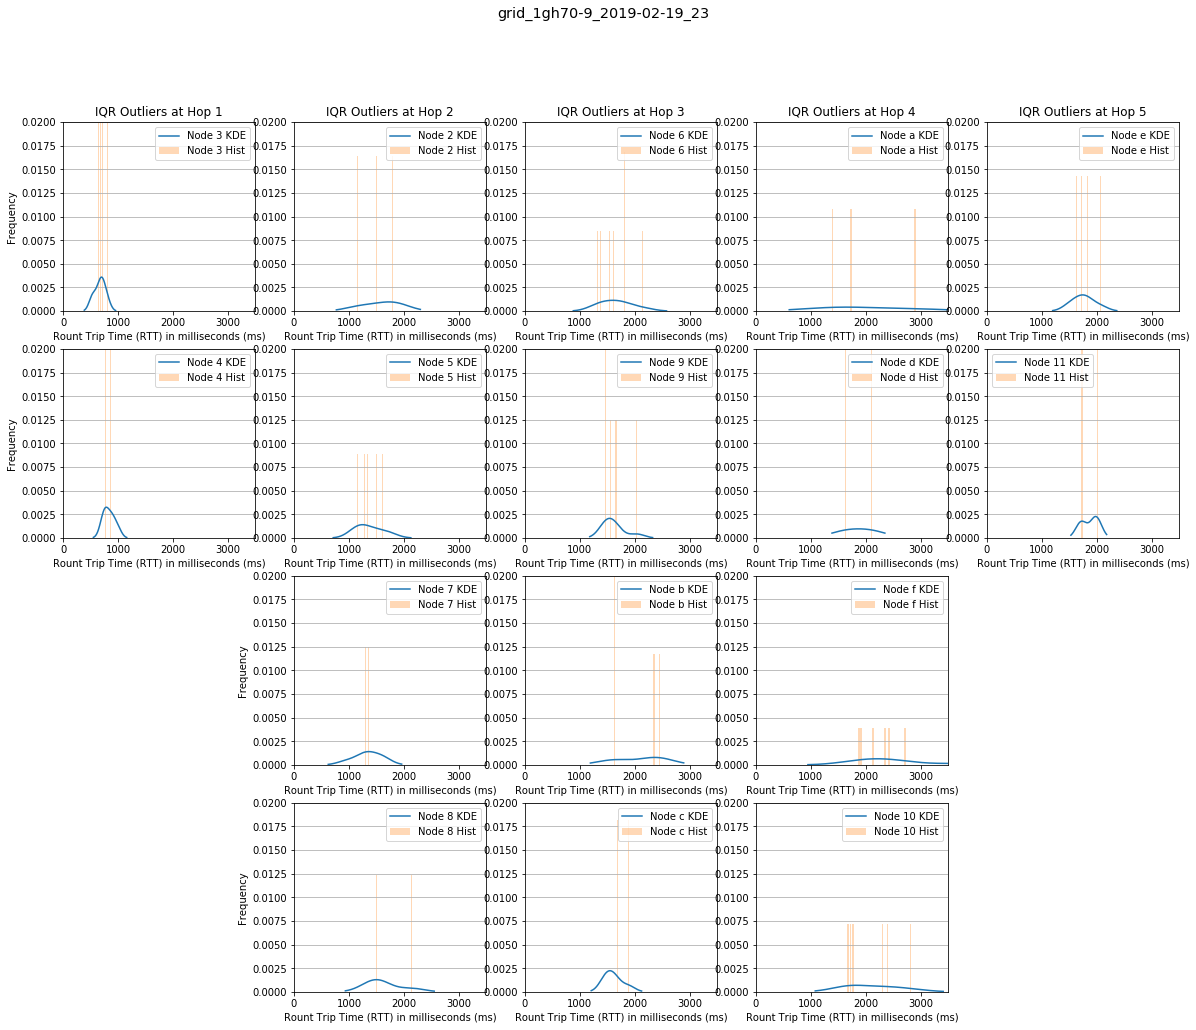

In [5]:
for row in plots:
    nodes, packets_node = trace_analysis.process_cooja2_traces(row[0], row[1])
    iqr_outliers = trace_analysis.compute_outliers_by_node(packets_node)
    plots_analysis.plot_histograms_iqr_outliers_hops_nodes(nodes, iqr_outliers, 3500, 0.02, row[1])

Compute statistics for each node in every experiment

In [9]:
stats = None

for row in plots:
    nodes, packets_node = trace_analysis.process_cooja2_traces(row[0], row[1])
    clean = trace_analysis.separate_outliers_by_node(packets_node)
    experiment = row[1]
    
    # Update stats
    if stats is None:
        stats = trace_statistics.compute_labeled_statistics(nodes, clean, experiment)
    else:
        stats = pd.concat([stats, trace_statistics.compute_labeled_statistics(nodes, clean, experiment)])

cols = ['label', 'node_id', 'hop', 'count', 'mean', 'var', 'std', 'min', 'max', 'loss']
stats = stats[cols].rename(index=str, columns={"label": "experiment", 'loss': 'loss (%)'}).sort_values(by=['experiment', 'hop']).reset_index(drop=True)


In [10]:
stats

experiment                  node_id  hop  count  \
0      grid_1bh-7_2019-02-19_22    aaaa::212:7403:3:303:    1    149   
1      grid_1bh-7_2019-02-19_22    aaaa::212:7404:4:404:    1    141   
2      grid_1bh-7_2019-02-19_22    aaaa::212:7407:7:707:    2    147   
3      grid_1bh-7_2019-02-19_22    aaaa::212:7408:8:808:    2    156   
4      grid_1bh-7_2019-02-19_22    aaaa::212:7402:2:202:    2    172   
5      grid_1bh-7_2019-02-19_22    aaaa::212:7405:5:505:    2    147   
6      grid_1bh-7_2019-02-19_22    aaaa::212:7406:6:606:    3    160   
7      grid_1bh-7_2019-02-19_22    aaaa::212:7409:9:909:    3    145   
8      grid_1bh-7_2019-02-19_22    aaaa::212:740c:c:c0c:    3    153   
9      grid_1bh-7_2019-02-19_22    aaaa::212:740d:d:d0d:    4    144   
10     grid_1bh-7_2019-02-19_22    aaaa::212:740a:a:a0a:    4    161   
11     grid_1bh-7_2019-02-19_22  aaaa::212:7410:10:1010:    4    138   
12     grid_1bh-7_2019-02-19_22    aaaa::212:740e:e:e0e:    5    178   
13     grid_1bh-7_2019-02-19_22  aaaa::212:7411:11:1111:    5    136   
14     grid_1bh-9_2019-02-20_00    aaaa::212:7403:3:303:    1    187   
15     grid_1bh-9_2019-02-20_00    aaaa::212:7404:4:404:    1    163   
16     grid_1bh-9_2019-02-20_00    aaaa::212:7402:2:202:    2    179   
17     grid_1bh-9_2019-02-20_00    aaaa::212:7408:8:808:    2    155   
18     grid_1bh-9_2019-02-20_00    aaaa::212:7407:7:707:    2    187   
19     grid_1bh-9_2019-02-20_00    aaaa::212:7405:5:505:    2    174   
20     grid_1bh-9_2019-02-20_00    aaaa::212:7409:9:909:    3    149   
21     grid_1bh-9_2019-02-20_00    aaaa::212:7406:6:606:    3    180   
22     grid_1bh-9_2019-02-20_00    aaaa::212:740b:b:b0b:    3    154   
23     grid_1bh-9_2019-02-20_00    aaaa::212:740c:c:c0c:    3    172   
24     grid_1bh-9_2019-02-20_00    aaaa::212:740a:a:a0a:    4    180   
25     grid_1bh-9_2019-02-20_00  aaaa::212:7410:10:1010:    4    143   
26     grid_1bh-9_2019-02-20_00    aaaa::212:740f:f:f0f:    4    168   
27     grid_1bh-9_2019-02-20_00    aaaa::212:740e:e:e0e:    5    187   
28   grid_1gh30-7_2019-02-19_22    aaaa::212:7404:4:404:    1    117   
29   grid_1gh30-7_2019-02-19_22    aaaa::212:7403:3:303:    1    126   
..                          ...                      ...  ...    ...   
110  grid_1gh70-9_2019-02-19_23    aaaa::212:7402:2:202:    2    114   
111  grid_1gh70-9_2019-02-19_23    aaaa::212:7408:8:808:    2    115   
112  grid_1gh70-9_2019-02-19_23    aaaa::212:7407:7:707:    2    135   
113  grid_1gh70-9_2019-02-19_23    aaaa::212:7405:5:505:    2    110   
114  grid_1gh70-9_2019-02-19_23    aaaa::212:7409:9:909:    3     95   
115  grid_1gh70-9_2019-02-19_23    aaaa::212:7406:6:606:    3    120   
116  grid_1gh70-9_2019-02-19_23    aaaa::212:740b:b:b0b:    3    117   
117  grid_1gh70-9_2019-02-19_23    aaaa::212:740c:c:c0c:    3     94   
118  grid_1gh70-9_2019-02-19_23    aaaa::212:740a:a:a0a:    4     97   
119  grid_1gh70-9_2019-02-19_23    aaaa::212:740d:d:d0d:    4     42   
120  grid_1gh70-9_2019-02-19_23  aaaa::212:7410:10:1010:    4     96   
121  grid_1gh70-9_2019-02-19_23    aaaa::212:740f:f:f0f:    4    116   
122  grid_1gh70-9_2019-02-19_23  aaaa::212:7411:11:1111:    5     94   
123  grid_1gh70-9_2019-02-19_23    aaaa::212:740e:e:e0e:    5    117   
124   grid_normal_2019-02-19_21    aaaa::212:7403:3:303:    1    140   
125   grid_normal_2019-02-19_21    aaaa::212:7404:4:404:    1    134   
126   grid_normal_2019-02-19_21    aaaa::212:7408:8:808:    2     94   
127   grid_normal_2019-02-19_21    aaaa::212:7402:2:202:    2    149   
128   grid_normal_2019-02-19_21    aaaa::212:7407:7:707:    2    125   
129   grid_normal_2019-02-19_21    aaaa::212:7405:5:505:    2    135   
130   grid_normal_2019-02-19_21    aaaa::212:7409:9:909:    3    104   
131   grid_normal_2019-02-19_21    aaaa::212:7406:6:606:    3    131   
132   grid_normal_2019-02-19_21    aaaa::212:740b:b:b0b:    3    111   
133   grid_normal_2019-02-19_21    aaaa::212:740a:a:a0a:    4